In [1]:
import warnings
warnings.filterwarnings('ignore')
import importlib

import numpy as np
# import wlcstat.wlc_copoly as wlc_copoly
# import wlcstat.wlcstruc as wlcstruc

import sys
sys.path.append("./vertex_subroutines")
from GAMcalc import *  # Code for calculating vertex functions
import propagator  # propagator object used to store pre-calculated values
import wignerD as wd # wigner D object used to store pre-calculated values

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

from scipy.interpolate import interp1d
from scipy import optimize

pset=propagator.prop_set(nlam=10) 
wigset = wd.wigner_d_vals()

In [2]:
from gaus_vertex import *

In [3]:
# importlib.reload(GAMcalc.py)

In [39]:
# def calc_monomer_matrix(poly_mat, dens):
#     # calculates the AA monomer identity cross correlation matrix
#     # assumes all polymers same length/ # of monomers, equal volume fraction of each
    
#     #polymat - each row is a polymer
#     #dens is an array where each entry is rel vol frac of correponding polymer
    
#     poly_mat = np.array(poly_mat)
#     if (np.sum(dens) != 1):
#         raise Exception("polymer volumer fractions do not sum to one")
#     if len(np.shape(poly_mat)) == 1: #single poly
#         n_p = 1
#         M = len(poly_mat)
#         alph1 =np.zeros(M)
#         alph2 =np.zeros(M)
#         sig1 = 1*(poly_mat == alph1)
#         sig2 = 1*(poly_mat == alph2)
#         M2_AA = np.outer(sig1, sig2)
#         return M2_AA
    
#     n_p = poly_mat.shape[0]
#     M = poly_mat.shape[1]
#     alph1 =np.zeros((n_p, M))
#     alph2 =np.zeros((n_p, M))
    
#     #extend dens into n_pxM matrix
#     poly_weights = (np.ones((n_p, M)).T * dens).T
    
#     #multiply sigams by density of each polymer
#     sigma1 = 1*((poly_mat == alph1))#.sum(axis = 0) #sigma. could multiply each
#     sigma2 = 1*((poly_mat == alph2))#.sum(axis = 0)

#     #need to do each row outer product with corresponding row, get n_p MxM matrices, then sum the results
#     prods = np.einsum('bi,bo->bio', sigma1*poly_weights, sigma2) # performing row wise cross product (each poly contribution)
#     M2_AA = np.sum(prods, axis = 0)#           ^^^^ averaging each contribution
#     return M2_AA


# def calc_sf2(poly_mat, dens, N_m=1, b=1, k_vec = np.logspace(-2, 2, 50)):
#     M2_AA = calc_monomer_matrix(poly_mat, dens)
#     M = np.shape(M2_AA)[0]
#     nk = len(k_vec)
#     N = M*N_m

#     grid = np.indices((M, M))
#     j1 = grid[0]
#     j2 = grid[1]
    
#     S2_AA_arr = np.zeros(nk)
#     S2_AB_arr = np.zeros(nk)
#     S2_BB_arr = np.zeros(nk)
    
#     M2_AB = M2_AA[j2, j2] - M2_AA
#     M2_BB = 1 - M2_AA[j1, j1] - M2_AA[j2, j2] + M2_AA[j1, j2]
    
#     for i, k in enumerate(k_vec):
#         C = np.zeros((M, M))
#         k = norm(k)
#         x_m = (1/6) * N_m * b**2 * k**2

#         #j1 = j2, s1 > s2
#         index = (j1 == j2)
#         constant = 1
#         debye = (2/(x_m**2)) * (x_m + np.exp(-x_m) - 1) 
        
#         C[np.where((index) != 0)] += debye
        
#         #j1 > j2, s1 s2 any
#         index = (j1 > j2)
#         constant = np.exp(-x_m*(j1-j2))
#         integral = (1/(x_m**2)) * (np.exp(x_m) + np.exp(-x_m) - 2) #for off-diagonal terms

#         C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
        
#         #j2 > j1, s1 s2 any
#         index = (j2 > j1)
#         constant = np.exp(-x_m*(j2-j1))
# #         integral is the same

#         C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral   
# #         print(C/M**2)
#         S2_AA_arr[i] = np.sum((1/M**2) * C * M2_AA)
#         S2_AB_arr[i] = np.sum((1/M**2) * C * M2_AB)
#         S2_BB_arr[i] = np.sum((1/M**2) * C * M2_BB)
#     return S2_AA_arr*N**2, S2_AB_arr*N**2, S2_BB_arr*N**2

# def calc_sf2_inv(poly_mat, dens, N_m, b, M, k_vec = np.logspace(-2, 2, 50)):
#     if norm(k_vec[0]) < 1e-5:
#         s2 = np.ones((2,2),dtype='complex')
#         N = N_m * M
#         return s2/N**2 # s2[0][0]/(N**2), s2[0][1]/(N**2), s2[1][1]/(N**2)
#     (S2_AA_arr, S2_AB_arr, S2_BB_arr) = calc_sf2(poly_mat, dens, N_m, b, k_vec)
#     det = S2_AA_arr * S2_BB_arr - S2_AB_arr**2
#     S2_AA_inv = S2_BB_arr * (1/det)
#     S2_AB_inv = -S2_AB_arr * (1/det)
#     S2_BB_inv = S2_AA_arr * (1/det)
    
#     s2inv = np.zeros((2,2))
#     s2inv[0][0] = S2_AA_inv[0]
#     s2inv[0][1] = s2inv[1][0] = S2_AB_inv[0]
#     s2inv[1][1] = S2_BB_inv[0]
#     return s2inv#(S2_AA_inv, S2_AB_inv, S2_BB_inv)

# def find_kstar(poly_mat, dens, N_m, b, M, k_vec = np.logspace(-2, 2, 50)):
#     (S2_AA_inv, S2_AB_inv, S2_BB_inv) = calc_sf2_inv(poly_mat, dens, N_m, b, M, k_vec)
#     G2 = 0.5*(S2_AA_inv - 2* S2_AB_inv + S2_BB_inv) # chi = 0

#     # eigvalues,eigvectors = np.linalg.eigh(G2)
#     eigvalues_lst = G2
#     min_eig = np.min(eigvalues_lst[~np.isnan(eigvalues_lst)])

#     k_star = k_vec[np.where(eigvalues_lst==min_eig)]#[0]][0] 
#     return k_star

# def calc_monomer_matrix_3(poly_mat, dens):
#     # calculates the AAA monomer identity cross correlation matrix
#     # assumes all polymers same length/ # of monomers, equal volume fraction of each
    
#     # polymat - each row is a polymer
#     # dens is an array where each entry is rel vol frac of correponding polymer
    
#     poly_mat = np.array(poly_mat)

#     if (np.sum(dens) != 1):
#         raise Exception("polymer volumer fractions do not sum to one")
#     if len(np.shape(poly_mat)) == 1: # single poly
#         n_p = 1
#         M = len(poly_mat)
#         alph1 =np.zeros(M)
#         alph2 =np.zeros(M)
#         alph3 =np.zeros(M)
#         sig1 = 1*(poly_mat == alph1)
#         sig2 = 1*(poly_mat == alph2)
#         sig3 = 1*(poly_mat == alph3)
# #         M2_AA = np.outer(sig1, sig2)
#         M3_AAA = np.einsum('i,j,k',sig1,sig2,sig3)
#         return M3_AAA
    
#     n_p = poly_mat.shape[0]
#     M = poly_mat.shape[1]
#     alph1 =np.zeros((n_p, M))
#     alph2 =np.zeros((n_p, M))
#     alph3 =np.zeros((n_p, M))

    
#     #extend dens into n_pxM matrix
#     poly_weights = (np.ones((n_p, M)).T * dens).T
    
#     #multiply sigams by density of each polymer
#     sigma1 = 1*((poly_mat == alph1))#.sum(axis = 0) #sigma. could multiply each
#     sigma2 = 1*((poly_mat == alph2))#.sum(axis = 0)
#     sigma3 = 1*((poly_mat == alph3))
    
#     #need to do each row outer product with corresponding row, get n_p MxMxM matrices, then sum the results
#     prods = np.einsum('bi,bo,bn->bion', sigma1*poly_weights, sigma2, sigma3) # performing row wise cross product (each poly contribution)
#     M3_AAA = np.sum(prods, axis = 0)#           ^^^^ averaging each contribution
#     return M3_AAA


# def calc_sf3(poly_mat, dens, N_m, b, k_vec, k_vec_2, plotting = False):
#     # for a gaussian chain of M monomers, each of length N_m
    
#     M3_AAA = calc_monomer_matrix_3(poly_mat, dens)
#     M = np.shape(M3_AAA)[0]
#     nk = len(k_vec)
#     N = M*N_m

#     grid = np.indices((M,M,M))
#     j1 = grid[0]
#     j2 = grid[1]
#     j3 = grid[2]
    
#     S3_AAA_arr =  np.zeros(nk)
#     S3_BAA_arr = np.zeros(nk)
#     S3_BBA_arr = np.zeros(nk)
#     S3_BBB_arr = np.zeros(nk)
    
#     S3_ABA_arr = np.zeros(nk)
#     S3_BAB_arr = np.zeros(nk)
    
#     S3_AAB_arr = np.zeros(nk)
#     S3_ABB_arr = np.zeros(nk)

    
#     M3_BAA = M3_AAA[j2, j2, j3] - M3_AAA
#     M3_BBA = M3_AAA + M3_BAA[j1, j3, j3] - M3_AAA[j2,j2,j3]
#     M3_BBB = 1  - M3_AAA[j1, j1, j1] - M3_BAA[j1, j2, j2] - M3_BAA[j1, j3, j3] + M3_AAA[j2,j2,j3] - M3_AAA
    
# #     M3_ABA = M3_AAA[j1,j1,j3] - M3_AAA
# #     M3_BAB = M3_AAA[j2,j2,j2] - M3_AAA[j2,j2,j3] - M3_AAA[j1,j2,j2] + M3_AAA
#     M3_AAB = M3_AAA[j1, j1, j2] - M3_AAA
#     M3_ABB = M3_AAA[j1,j1,j1] - M3_AAA[j1,j1,j2] - M3_AAA[j1,j1,j3] + M3_AAA
    
    
#     for i, k_1 in enumerate(k_vec):
#         k_2 = k_vec_2[i]
#         k_12 = k_1 + k_2

#         # CASE 1; kA = k1 + k2, kB = k_1; S3 > S2 > S1 and S1 > S2 > S3
#         case1 = [[k_12, k_1], [j3, j2, j1]]

#         # CASE 2; kA = k2, kB = k1 + k2; S2 > S1 > S3 and S3 > S1 > S2
#         case2 = [[k_2, k_12], [j2, j1, j3]]
        
#         # CASE 3; kA = k2, kB = -k1; S2 > S3 > S1 and S1 > S3 > S2
#         case3 = [[k_2, -k_1], [j2, j3, j1]]
        
#         case_arr = [case1, case2, case3]#, case1deg, case2deg, case3deg]
#         # need to consider degenerate cases. flipping each element in array, then appending to original case array
#         case_arr = np.vstack((case_arr, [[np.flipud(el) for el in cse] for cse in case_arr]))
        
# #        for each case and sub case, add to a matrix C(j1, j2, j3) which contains the contribution to the overall S3
# #        then sum over all indices. Need to keep track of js so that aproiate multiplications with cross corr matrix M3        
#         C = np.zeros((M,M,M))

#         for cse in case_arr:
#             kA, kB = cse[0]
#             ordered_js = cse[1]
            
#             xm_A = (1/6) * N_m * b**2 * np.linalg.norm(kA)**2
#             xm_B = (1/6) * N_m * b**2 * np.linalg.norm(kB)**2
            
#             C = calc_case_s3(C, xm_A, xm_B, ordered_js)
    
#         S3_AAA_arr[i] += np.sum((1/M**3) * M3_AAA * C)*(N**3)
#         S3_BAA_arr[i] += np.sum((1/M**3) * M3_BAA * C)*(N**3)
#         S3_BBA_arr[i] += np.sum((1/M**3) * M3_BBA * C)*(N**3)
#         S3_BBB_arr[i] += np.sum((1/M**3) * M3_BBB * C)*(N**3)
        
# #         S3_ABA_arr[i] += np.sum((1/M**3) * M3_ABA * C)*(N**3)
# #         S3_BAB_arr[i] += np.sum((1/M**3) * M3_BAB * C)*(N**3)
        
#         S3_AAB_arr[i] += np.sum((1/M**3) * M3_AAB * C)*(N**3)
#         S3_ABB_arr[i] += np.sum((1/M**3) * M3_ABB * C)*(N**3)
        
#     s3 = np.zeros((2,2,2)) 
#     s3[0][0][0] = S3_AAA_arr[0]
#     s3[1][0][0] = s3[0][1][0] = S3_BAA_arr[0]
#     s3[0][0][1] = S3_AAB_arr[0]
#     s3[0][1][1] = s3[1][0][1] = S3_ABB_arr[0]
#     s3[1][1][0] = S3_BBA_arr[0]
#     s3[1][1][1] = S3_BBB_arr[0]
    
#     if plotting: # matrix only contains single value, for calculating gamma functions
#         return S3_AAA_arr, S3_AAB_arr, S3_ABA_arr, S3_BAA_arr, S3_ABB_arr, S3_BAB_arr,  S3_BBA_arr, S3_BBB_arr
    
#     return s3

# def calc_case_s3(C, xm_A, xm_B, ordered_js):

#     jmax, jmid, jmin = ordered_js
    
#     cylindrical = False
#     epsilon = 0.0000001
#     if xm_A + epsilon > xm_B and xm_A - epsilon < xm_B:
#         cylindrical = True
    
#     xm_A_eq_0 = False
#     if xm_A < 1e-5:
#         xm_A_eq_0 = True
        
#     xm_B_eq_0 = False
#     if xm_B < 1e-5:
#         xm_B_eq_0 = True

#     #for each sub case, looking at the degenerate case where 1 and 2 are switched
#     constant = np.exp(-xm_A*(jmax - jmid)) * np.exp(-xm_B*(jmid - jmin)) 

#     # sub case 1; jmax > jmid > jmin, {s1, s2, s3} any 
#     index = (jmax > jmid) * (jmid > jmin)
    
#     if cylindrical == True:
#         integral = (1 / xm_A**2) * 2 * (-1 + np.cosh(xm_A))
#     elif xm_B_eq_0:
#         integral = (2*(-1+np.cosh(xm_A)))/ (xm_A**2)
#     elif xm_A_eq_0:
#         integral = (2*(-1+np.cosh(xm_B)))/ (xm_B**2)
#     else:
#         integral = (-2 / (xm_A * (xm_A - xm_B) * xm_B)) \
#         * (-np.sinh(xm_A) + np.sinh(xm_A - xm_B) + np.sinh(xm_B))

#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
    
#     # sub case 2; jmax = jmid > jmin, s3 > s2, {s1} any
#     index = (jmax == jmid) * (jmid > jmin)
    
#     if cylindrical == True:
#         integral = (1 / xm_A**3) *( (2 + xm_A) * (-1 + np.cosh(xm_A)) - (xm_A * np.sinh(xm_A)) )
#     elif xm_B_eq_0:
#         integral = (-1 + xm_A + np.cosh(xm_A) - np.sinh(xm_A))/ (xm_A**2)
#     elif xm_A_eq_0:
#         integral = (np.exp(-xm_B)*(-1 + np.exp(xm_B))*(1+np.exp(xm_B)*(-1 + xm_B))) / (xm_B**3)   
#     else:
#         integral = ((-1 + np.exp(xm_B))/(xm_A * (xm_A - xm_B)*xm_B**2)) \
#         * (xm_A + (-1 + np.exp(-xm_A))*xm_B - xm_A*np.cosh(xm_B) + xm_A*np.sinh(xm_B))

#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral 

#     # BONUS sub case 4; jmax > jmid = jmin, s2 > s1, {s3} any 
#     index = (jmax > jmid) * (jmid == jmin)
    
#     if cylindrical == True:
#         integral = (1 / xm_A**3) *( (2 + xm_A) * (-1 + np.cosh(xm_A)) - (xm_A * np.sinh(xm_A)) )
#     elif xm_B_eq_0:
#         integral = ((-2+xm_A)*(-1+np.cosh(xm_A))+ (xm_A*np.sinh(xm_A)))/ (xm_A**3)
#     elif xm_A_eq_0:
#         integral = (-1+xm_B+np.cosh(xm_B) - np.sinh(xm_B))/ (xm_B**2)
#     else:
#         integral = (((-1 + np.exp(xm_A))*(np.exp(-xm_A - xm_B)))/(xm_B * (xm_A - xm_B)*xm_A**2)) \
#         * (-np.exp(xm_A)*xm_A + np.exp(xm_A + xm_B) * (xm_A -xm_B) + np.exp(xm_B)*xm_B)

#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral 

#     # sub case 3; jmax = jmid = jmin, s3 > s2 > s1
#     index = (jmax == jmid) * (jmid == jmin)

#     if cylindrical == True:
#         integral = (1 / xm_A**3) * (np.exp(-xm_A) * (2 + np.exp(xm_A)*(-2 + xm_A) + xm_A))
#     elif xm_B_eq_0:
#         integral = (2-2*np.exp(-xm_A) - 2*xm_A + xm_A**2)/ (2*xm_A**3)
#     elif xm_A_eq_0:
#         integral = (2-2*np.exp(-xm_B) - 2*xm_B + xm_B**2)/ (2*xm_B**3)
#     else:
#         integral = (1 / (xm_A**2 * xm_B - xm_A * xm_B**2))\
#         * ( xm_A + (((-1 + np.exp(-xm_B)) * xm_A)/(xm_B)) - xm_B + ((xm_B - np.exp(-xm_A)*xm_B)/(xm_A)) )

#     C[np.where(index != 0)] += 1\
#                                     * constant[np.where(index != 0)]\
#                                     * integral
#     return C


# def calc_monomer_matrix_4(poly_mat, dens):
#     # calculates the AAAA monomer identity cross correlation matrix
#     # assumes all polymers same length/ # of monomers, equal volume fraction of each
    
#     # polymat - each row is a polymer
#     # dens is an array where each entry is rel vol frac of correponding polymer
#     poly_mat = np.array(poly_mat)

#     if (np.sum(dens) != 1):
#         raise Exception("polymer volumer fractions do not sum to one")
#     if len(np.shape(poly_mat)) == 1: # single poly
#         n_p = 1
#         M = len(poly_mat)
#         alph1 =np.zeros(M)
#         alph2 =np.zeros(M)
#         alph3 =np.zeros(M)
#         alph4 =np.zeros(M)

#         sig1 = 1*(poly_mat == alph1)
#         sig2 = 1*(poly_mat == alph2)
#         sig3 = 1*(poly_mat == alph3)
#         sig4 = 1*(poly_mat == alph3)

#         M4_AAAA = np.einsum('i,j,k,l',sig1,sig2,sig3,sig4)
#         return M4_AAAA
    
#     n_p = poly_mat.shape[0]
#     M = poly_mat.shape[1]
#     alph1 =np.zeros((n_p, M))
#     alph2 =np.zeros((n_p, M))
#     alph3 =np.zeros((n_p, M))
#     alph4 =np.zeros((n_p, M))
    
#     #extend dens into n_pxM matrix
#     poly_weights = (np.ones((n_p, M)).T * dens).T
    
#     #multiply sigams by density of each polymer
#     sigma1 = 1*((poly_mat == alph1))#.sum(axis = 0) #sigma. could multiply each
#     sigma2 = 1*((poly_mat == alph2))#.sum(axis = 0)
#     sigma3 = 1*((poly_mat == alph3))
#     sigma4 = 1*((poly_mat == alph4))
    
#     #need to do each row outer product with corresponding row, get n_p MxMxM matrices, then sum the results
#     prods = np.einsum('bi,bo,bn,bm->bionm', sigma1*poly_weights, sigma2, sigma3, sigma4) # performing row wise cross product (each poly contribution)
#     M4_AAAA = np.sum(prods, axis = 0)#           ^^^^ averaging each contribution
#     return M4_AAAA

# def calc_sf4(poly_mat, dens, N_m, b, k_vec, k_vec_2, k_vec_3, plotting = False):
#     M4_AAAA = calc_monomer_matrix_4(poly_mat, dens)
#     M = np.shape(M4_AAAA)[0]
#     nk = len(k_vec)
#     N = M*N_m

#     grid = np.indices((M,M,M,M))
#     j1 = grid[0]
#     j2 = grid[1]
#     j3 = grid[2]
#     j4 = grid[3]
    
#     S4_AAAA_arr = np.zeros(nk)
#     S4_AAAB_arr = np.zeros(nk)
#     S4_AABB_arr = np.zeros(nk)
#     S4_ABBB_arr = np.zeros(nk)
#     S4_BBBB_arr = np.zeros(nk)
    
#     S4_ABAB_arr = np.zeros(nk)
#     S4_ABBA_arr = np.zeros(nk)
#     S4_BBBA_arr = np.zeros(nk)
#     S4_BBAB_arr = np.zeros(nk)
#     S4_BABB_arr = np.zeros(nk)
    
#     M4_BAAA = M4_AAAA[j2, j2, j3, j4] - M4_AAAA
#     M4_BBAA = M4_BAAA[j1, j3, j3, j4] - M4_BAAA
#     M4_BBBA = M4_BBAA[j1, j2, j4, j4] - M4_BBAA
#     M4_BBBB = 1 - M4_AAAA[j1, j1, j1, j1] - M4_AAAA[j2, j2, j2, j2] - M4_AAAA[j3, j3, j3, j3]  + M4_AAAA[j1, j1, j3, j3]\
#     + M4_AAAA[j2, j2, j3, j3] + M4_AAAA[j1, j1, j2, j2] - M4_AAAA[j1, j2, j3, j3] - M4_BBBA

#     M4_ABAB = M4_AAAA[j1, j1, j3, j3] - M4_AAAA[j1, j1, j3, j4] - M4_AAAA[j1, j1, j2, j3] + M4_AAAA
#     M4_ABBA = M4_AAAA[j1,j1,j4,j4] - M4_AAAA[j1, j1, j4, j3] - M4_AAAA[j1, j1, j2, j4] + M4_AAAA[j1, j2, j4, j3]
#     M4_BBAB = M4_ABBA[j3, j2, j4, j3] - M4_ABBA[j1, j2, j4, j3]
#     M4_BABB = M4_ABBA[j2, j4, j3, j2] - M4_ABBA[j1, j4, j3, j2]
#     M4_ABBB = M4_ABBA[j1, j2, j3, j1] - M4_ABBA[j4, j2, j3, j1]
    
#     for i, k1 in enumerate(k_vec):
#         k2 = k_vec_2[i]
#         k3 = k_vec_3[i]
#         k12 = k1 + k2
#         k13 = k1 + k3
#         k23 = k2 + k3
#         k123 = k1 + k2 + k3
        
#         # CASE 1; kA = k1 + k2 + k3; kB = k_1 + k_2; kC = k_1  S4 > S3 > S2 > S1 (and reverse). All cases on wlcstat
#         case1 = [[k123, k12, k1], [j4, j3, j2, j1]]
#         case2 = [[k123, k12, k2], [j4, j3, j1, j2]]
#         case3 = [[k123, k13, k1], [j4, j2, j3, j1]]
#         case4 = [[k123, k23, k2], [j4, j1, j3, j2]]
#         case5 = [[k123, k13, k3], [j4, j2, j1, j3]]
#         case6 = [[k123, k23, k3], [j4, j1, j2, j3]]
#         case7 = [[-k3, k12, k1], [j3, j4, j2, j1]]
#         case8 = [[-k3, k12, k2], [j3, j4, j1, j2]]
#         case9 = [[-k2, k13, k1], [j2, j4, j3, j1]]
#         case10 = [[-k1, k23, k2], [j1, j4, j3, j2]]
#         case11 = [[-k2, k13, k3], [j2, j4, j1, j3]]
#         case12 = [[-k1, k23, k3], [j1, j4, j2, j3]]
        
#         case_arr = [case1, case2, case3, case4, case5, case6, \
#                    case7, case8, case9, case10, case11, case12]
        
#         # need to consider degenerate cases. flipping each element in array, then appending to original case array
#         case_arr = np.vstack((case_arr, [[np.flipud(el) for el in cse] for cse in case_arr]))
        
# #        for each case and sub case, add to a matrix C(j1, j2, j3, j4) which contains the contribution to the overall S4
# #        then sum over all indices. Need to keep track of js so that aproiate multiplications with cross corr matrix M4 
#         C = np.zeros((M,M,M,M))
#         for cse in case_arr:
#             kA, kB, kC = cse[0]
#             ordered_js = cse[1]
            
#             xm_A = (1/6) * N_m * b**2 * np.linalg.norm(kA)**2
#             xm_B = (1/6) * N_m * b**2 * np.linalg.norm(kB)**2
#             xm_C = (1/6) * N_m * b**2 * np.linalg.norm(kC)**2
            
#             C = calc_case_s4(C, xm_A, xm_B, xm_C, ordered_js)
            
#         S4_AAAA_arr[i] += np.sum((1/M**4) * M4_AAAA * C)*(N**4)
#         S4_AAAB_arr[i] += np.sum((1/M**4) * M4_BAAA * C)*(N**4)
#         S4_AABB_arr[i] += np.sum((1/M**4) * M4_BBAA * C)*(N**4)
#         S4_ABBB_arr[i] += np.sum((1/M**4) * M4_BBBA * C)*(N**4)
#         S4_BBBB_arr[i] += np.sum((1/M**4) * M4_BBBB * C)*(N**4)
        
#         S4_ABAB_arr[i] += np.sum((1/M**4) * M4_ABAB * C)*(N**4)
#         S4_ABBA_arr[i] += np.sum((1/M**4) * M4_ABBA * C)*(N**4)
#         S4_BBBA_arr[i] += np.sum((1/M**4) * M4_BBBA * C)*(N**4)
#         S4_BBAB_arr[i] += np.sum((1/M**4) * M4_BBAB * C)*(N**4)
#         S4_BABB_arr[i] += np.sum((1/M**4) * M4_BABB * C)*(N**4)

#     s4 = np.zeros((2, 2, 2, 2))
    
#     s4[0][0][0][0] = S4_AAAA_arr[0]
#     s4[0][0][0][1] = s4[0][0][1][0] = s4[0][1][0][0] = s4[1][0][0][0] = S4_AAAB_arr[0]
#     s4[0][0][1][1] = s4[1][1][0][0] = S4_AABB_arr[0]
#     s4[1][0][0][1] = s4[0][1][1][0] = S4_ABBA_arr[0]
#     s4[1][0][1][0] = s4[0][1][0][1] = S4_ABAB_arr[0]
#     s4[1][1][1][0] = S4_BBBA_arr[0]
#     s4[1][1][0][1] = S4_BBAB_arr[0]
#     s4[1][0][1][1] = S4_BABB_arr[0]
#     s4[0][1][1][1] = S4_ABBB_arr[0]
#     s4[1][1][1][1] = S4_BBBB_arr[0]
    
#     if plotting: # matrix only contains single value, for calculating gamma functions
#         return S4_AAAA_arr, S4_AAAB_arr, S4_AABB_arr, S4_ABAB_arr, S4_ABBA_arr, S4_ABBB_arr, S4_BABB_arr, S4_BBAB_arr, S4_BBBA_arr, S4_BBBB_arr 
    
#     return s4 

# def calc_case_s4(C, xm_A, xm_B, xm_C, ordered_js):

#     jmax, jupp, jlow, jmin = ordered_js
    
#     xmA_eq_xmB = False
#     xmA_eq_xmC = False
#     xmB_eq_xmC = False
#     epsilon = 0.0000001
#     if xm_A + epsilon > xm_B and xm_A - epsilon < xm_B:
#         xmA_eq_xmB = True
#     if xm_A + epsilon > xm_C and xm_A - epsilon < xm_C:
#         xmA_eq_xmC = True
#     if xm_B + epsilon > xm_C and xm_B - epsilon < xm_C:
#         xmB_eq_xmC = True
        
#     xm_B_eq_0 = False
#     if xm_B < 1e-5:
#         xm_B_eq_0 = True

#     #for each sub case, looking at the degenerate case where 1 and 2 are switched
#     constant = np.exp(-xm_A*(jmax - jupp)- xm_B*(jupp - jlow) - xm_C*(jlow - jmin))

#     # sub case 1; jmax > jupp > jlow > jmin, {s1234} any
#     index = (jmax > jupp) * (jupp > jlow) * (jlow > jmin)

#     if xmA_eq_xmB and xmB_eq_xmC:
#         integral = 2*(-1 + np.cosh(xm_A)) / xm_A**2
#     elif xm_B_eq_0 and (not xmA_eq_xmC): #fABCBzero
#         integral = (16 / (xm_A**2 * xm_C**2) )* \
#                     np.sinh(xm_A / 2)**2 *np.sinh(xm_C / 2)**2
#     elif xm_B_eq_0 and xmA_eq_xmC: #fABABzero
#         integral = (16 / xm_A**4 )* \
#                     np.sinh(xm_A / 2)**4
#     elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
#         integral = (16*np.sinh(xm_A / 2) * np.sinh((xm_A - xm_B)/2) * np.sinh((xm_B - xm_C)/2) * np.sinh(xm_C/2))\
#                     / (xm_A * (xm_A - xm_B) * (xm_B - xm_C) * xm_C)
#     elif xmA_eq_xmB:
#         integral = -(2 / (xm_A*xm_C*(xm_A - xm_C))) * \
#                     (-np.sinh(xm_A) + np.sinh(xm_A - xm_C) + np.sinh(xm_C))
#     elif xmB_eq_xmC:
#         integral = -(2 / (xm_A*xm_B*(xm_A - xm_B))) * \
#                     (-np.sinh(xm_A) + np.sinh(xm_A - xm_B) + np.sinh(xm_B))
#     elif xmA_eq_xmC:
#         integral = (16 / (xm_A**2 * (xm_A - xm_B)**2) )* \
#                     np.sinh(xm_A / 2)**2 *np.sinh((xm_A - xm_B) / 2)**2

#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
    
#     # sub case 2; jmax = jupp > jlow > jmin
#     index = (jmax == jupp) * (jupp > jlow) * (jlow > jmin)

#     if xmA_eq_xmB and xmB_eq_xmC:
#         integral = (np.exp(-xm_A) * (-1 + np.exp(xm_A)) * (-1 + np.exp(xm_A) - xm_A))\
#         / (xm_A**3)
        
#     elif xm_B_eq_0 and (not xmA_eq_xmC): #fABCBzero
#         integral = ((np.exp(-xm_A - xm_C)) * (-1+np.exp(xm_C))**2 * (1+np.exp(xm_A) *(-1 + xm_A)))\
#         /(xm_A**2*xm_C**2)
#     elif xm_B_eq_0 and xmA_eq_xmC: #fABABzero
#         integral = ((np.exp(-2*xm_A)) * (-1+np.exp(xm_A))**2 * (1+np.exp(xm_A) *(-1 + xm_A)))\
#         /(xm_A**2*xm_A**2)
        
#     elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
#         integral = ((np.exp(-xm_A-xm_B-xm_C)) * (-1+np.exp(xm_C)) * (-np.exp(xm_B)+np.exp(xm_C))\
#                     * (-np.exp(xm_A)*xm_A + np.exp(xm_A + xm_B)*(xm_A-xm_B) + np.exp(xm_B)*xm_B))\
#                     / (xm_A*xm_B*xm_C*(xm_A - xm_B) * (xm_C - xm_B))
#     elif xmA_eq_xmB:
#         integral = ((np.exp(-xm_A - xm_C)) * (-1+np.exp(xm_C)) * (-np.exp(xm_A)+np.exp(xm_C)) * (-1+np.exp(xm_A) - xm_A))\
#         /(xm_A**2*xm_C*(xm_C - xm_A))
#     elif xmB_eq_xmC:
#         integral = ((-1+np.exp(xm_B))*(xm_A - xm_A*np.exp(-xm_B) + (-1+np.exp(-xm_A))*xm_B))/(xm_B**2*xm_A*(xm_A - xm_B))
#     elif xmA_eq_xmC:
#         integral = ( (np.exp(-2*xm_A-xm_B))*(-1+np.exp(xm_A))*(np.exp(xm_A) - np.exp(xm_B))\
#                     *(-np.exp(xm_A)*xm_A + np.exp(xm_A + xm_B)*(xm_A-xm_B) + np.exp(xm_B)*xm_B)) / (xm_B*xm_A**2*(xm_A-xm_B)**2)

#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
    


#     # sub case 3; jmax > jupp = jlow > jmin
#     index = (jmax > jupp) * (jupp == jlow) * (jlow > jmin)

#     if xmA_eq_xmB and xmB_eq_xmC:
#         integral = (-1 + np.cosh(xm_A)) / (xm_A**2)
        
#     elif xm_B_eq_0 and (not xmA_eq_xmC): #fABCBzero
#         integral = ((np.exp(-xm_A - xm_C)) * (-1+np.exp(xm_A)) * (-1+np.exp(xm_C)) * (-np.exp(xm_A)*xm_A + np.exp(xm_A+xm_C)*(xm_A-xm_C) + np.exp(xm_C)*xm_C))\
#         /(xm_A**2*xm_C**2*(xm_A - xm_C))
#     elif xm_B_eq_0 and xmA_eq_xmC: #fABABzero
#         integral = (np.exp(-xm_A) * (-1+np.exp(xm_A))**2 * (-1 + np.exp(xm_A) - xm_A))\
#         /(xm_A**4)
        
#     elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
#         integral = ((1-np.exp(-xm_A))*(-1+np.exp(xm_C))*( ( (1-np.exp(xm_A-xm_B))/(xm_A-xm_B) ) + ( (-1+np.exp(xm_A-xm_C))/(xm_A-xm_C) ) ))/(xm_A*xm_C*(xm_B - xm_C))
#     elif xmA_eq_xmB:
#         integral = ((np.exp(-xm_A - xm_C)) * (-1+np.exp(xm_A)) * (-1+np.exp(xm_C)) * (np.exp(xm_A)+np.exp(xm_C)*(-1-xm_A+xm_C)))\
#         /(xm_A*xm_C*(xm_A - xm_C)**2)
#     elif xmB_eq_xmC:
#         integral = ((np.exp(-xm_A - xm_B)) * (-1+np.exp(xm_A)) * (-1+np.exp(xm_B)) * (np.exp(xm_B)+np.exp(xm_A)*(-1+xm_A-xm_B)))\
#         /(xm_A*xm_B*(xm_A - xm_B)**2)
#     elif xmA_eq_xmC:
#         integral = ((np.exp(-xm_A - xm_B)) * (-1+np.exp(xm_A))**2 * (np.exp(xm_A)+np.exp(xm_B)*(-1-xm_A+xm_B)))/(xm_A**2 * (xm_A - xm_B)**2)
  
#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
    


#     # sub case 4; jmax > jupp > jlow = jmin
#     index = (jmax > jupp) * (jupp > jlow) * (jlow == jmin)

#     if xmA_eq_xmB and xmB_eq_xmC:
#         integral = ((2+xm_A)*(-1+np.cosh(xm_A)) - xm_A*np.sinh(xm_A))/(xm_A**3)
    
#     elif xm_B_eq_0 and (not xmA_eq_xmC): #fABCBzero
#         integral = (np.exp(-xm_A - xm_C) * (-1+np.exp(xm_A))**2 * (1 + np.exp(xm_C)*(-1 + xm_C)))\
#         /(xm_A**2*xm_C**2)
#     elif xm_B_eq_0 and xmA_eq_xmC: #fABABzero
#         integral = (np.exp(-2*xm_A) * (-1+np.exp(xm_A))**2 * (1 + np.exp(xm_A)*(-1 + xm_A)))\
#         /(xm_A**4)
        
#     elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
#         integral = ((np.exp(-xm_A-xm_B-xm_C)) * (-1+np.exp(xm_A)) * (-np.exp(xm_B)+np.exp(xm_A))\
#                     * (-np.exp(xm_B)*xm_B + np.exp(xm_C + xm_B)*(xm_B-xm_C) + np.exp(xm_C)*xm_C))\
#                     / (xm_A*xm_B*xm_C*(xm_A - xm_B) * (xm_B - xm_C))
#     elif xmA_eq_xmB:
#         integral = ((np.exp(-xm_A-xm_C)) * (-1+np.exp(xm_A)) * (-np.exp(xm_A)*xm_A + np.exp(xm_A+xm_C)*(xm_A-xm_C)+np.exp(xm_C)*xm_C)) / (xm_A**2*xm_C*(xm_A - xm_C))
#     elif xmB_eq_xmC:
#         integral = ((np.exp(-xm_A - xm_B)) * (-1+np.exp(xm_A)) * (-np.exp(xm_A)+np.exp(xm_B)) * (-1+np.exp(xm_B) - xm_B))\
#         /(xm_A*xm_B**2*(xm_B - xm_A))
#     elif xmA_eq_xmC:
#         integral = ( (np.exp(-2*xm_A-xm_B))*(-1+np.exp(xm_A))*(np.exp(xm_A) - np.exp(xm_B))\
#                     *(-np.exp(xm_A)*xm_A + np.exp(xm_A + xm_B)*(xm_A-xm_B) + np.exp(xm_B)*xm_B)) / (xm_B*xm_A**2*(xm_A-xm_B)**2)
  
#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
    
    
#     # sub case 5; jmax == jupp == jlow > jmin
#     index = (jmax == jupp) * (jupp == jlow) * (jlow > jmin)

#     if xmA_eq_xmB and xmB_eq_xmC:
#         integral = (np.exp(-xm_A) * (-1 + np.exp(xm_A)) * (-2 + 2*np.exp(xm_A) - 2*xm_A - xm_A**2))\
#         / (2*xm_A**4)
        
#     elif xm_B_eq_0 and (not xmA_eq_xmC): #fABCBzero
#         integral = ((-1+np.ezp(xm_C))*( -xm_C + (   (xm_A*(-1+np.exp(-xm_C) + xm_C))  / (xm_C)  ) +  ( (xm_C-np.exp(-xm_A)*xm_C)  / (xm_A)  )     )) / (xm_A*(xm_A-xm_C)*xm_C**2)
#     elif xm_B_eq_0 and xmA_eq_xmC: #fABABzero
#         integral = (4-4*np.cosh(xm_A) + 2*xm_A*np.sinh(xm_A)) / (xm_A**4)
        
#     elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
#         integral = ((-1+np.exp(xm_C)) * (  ( (np.exp(-xm_B))/((xm_A-xm_B)*xm_B)   )  +  ( (xm_B - xm_C)/(xm_A*xm_B*xm_C)  )  +   (   (np.exp(-xm_C))/(xm_C*(xm_C-xm_A))    )  +    (    (np.exp(-xm_A)*(-xm_B+xm_C)) / ( xm_A*(xm_A-xm_B)*(xm_A-xm_C))  )   ))/((xm_B-xm_C)*xm_C)
#     elif xmA_eq_xmB:
#         integral = ((-1+np.exp(xm_C))* (  (-np.exp(-xm_C) * xm_A**2)     +    ((xm_A-xm_C)**2)    +     (np.exp(-xm_A)*xm_C*(xm_A**2 - xm_A*(-2+xm_C)-xm_C)) ))/(xm_A**2*xm_C**2*(xm_A-xm_C)**2)
#     elif xmB_eq_xmC:
#         integral = -((-1+np.exp(xm_B))* (  (np.exp(-xm_A) * xm_B**2)     +    -((xm_A-xm_B)**2)    +     (np.exp(-xm_B)*xm_A*(xm_A*(1+xm_B) - xm_B*(2+xm_B))) ))/(xm_B**3*xm_A*(xm_A-xm_B)**2)
#     elif xmA_eq_xmC:
#         integral = ((-1+np.exp(xm_A))* (  (-np.exp(-xm_B) * xm_A**2)     +    ((xm_A-xm_B)**2)    +     (np.exp(-xm_A)*xm_B*(xm_A**2 - xm_A*(-2+xm_B)-xm_B)) ))/(xm_A**3*xm_B*(xm_A-xm_B)**2)

        
#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
    
#     # sub case 6; jmax > jupp == jlow = jmin
#     index = (jmax > jupp) * (jupp == jlow) * (jlow == jmin)

#     if xmA_eq_xmB and xmB_eq_xmC:
#         integral = ((-1 + np.exp(-xm_A)) * (2 - 2*np.exp(xm_A) + 2*xm_A + xm_A**2))\
#         / (2*xm_A**4)
        
#     elif xm_B_eq_0 and (not xmA_eq_xmC): #fABCBzero
#         integral = (np.exp(-xm_A - xm_C)) * (-1 + np.exp(xm_A)) * ( (np.exp(xm_A)*xm_A**2)  +   (np.exp(xm_A+xm_C)*(xm_A-xm_C)*(xm_A*(-1+xm_C) -xm_C) )   -    (np.exp(xm_C)*xm_C**2) ) / (xm_A**3*(xm_A-xm_C)*xm_C**2)
#     elif xm_B_eq_0 and xmA_eq_xmC: #fABABzero
#         integral = (4-4*np.cosh(xm_A) + 2*xm_A*np.sinh(xm_A)) / (xm_A**4)
        
#     elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
#         integral = ( (np.exp(-xm_A - xm_B - xm_C)) * (-1+np.exp(xm_A)) * \
#                    (          (-np.exp(xm_A+xm_B)*xm_A*(xm_A-xm_B)*xm_B)      +         (np.exp(xm_A+xm_C)*xm_A*(xm_A-xm_C)*xm_C)     +       (np.exp(xm_B+xm_C)*(xm_B-xm_C)*(np.exp(xm_A)*(xm_A-xm_B)*(xm_A-xm_C) -xm_B*xm_C) )     ))\
#                     / (xm_A**2 * (xm_A - xm_B) * xm_B * (xm_A-xm_C) * (xm_B - xm_C) * xm_C)
#     elif xmA_eq_xmB:
#         integral = ( (np.exp(-xm_A - xm_C)) * (-1 + np.exp(xm_A)) * ((-np.exp(xm_A)*xm_A**2) +   (np.exp(xm_A+xm_C)*(xm_A-xm_C)**2)    +    -(np.exp(xm_C)*xm_C*(-xm_A**2+xm_A*(-2+xm_C)+xm_C)) ))/ (xm_A**3*(xm_A-xm_C)**2*xm_C)
#     elif xmB_eq_xmC:
#         integral = ( (np.exp(-xm_A - xm_B)) * (-1 + np.exp(xm_A)) * ((-np.exp(xm_B)*xm_B**2) +   (np.exp(xm_A+xm_B)*(xm_A-xm_B)**2)    +    -(np.exp(xm_A)*xm_A*(xm_A*(1+xm_B)-xm_B*(2+xm_B))) ))/ (xm_A**2*(xm_A-xm_B)**2*xm_B**2)
#     elif xmA_eq_xmC:
#         integral = ( (np.exp(-xm_A - xm_B)) * (-1 + np.exp(xm_A)) * ((-np.exp(xm_A)*xm_A**2) +   (np.exp(xm_A+xm_B)*(xm_A-xm_B)**2)    +    -(np.exp(xm_B)*xm_B*(-xm_A**2+xm_A*(-2+xm_B)+xm_B)) ))/ (xm_A**3*(xm_A-xm_B)**2*xm_B)
    
#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
    
#     # sub case 7; jmax == jupp == jlow = jmin
#     index = (jmax == jupp) * (jupp == jlow) * (jlow == jmin)

#     if xmA_eq_xmB and xmB_eq_xmC:
#         integral = (np.exp(-xm_A) * (6 + 2*(np.exp(xm_A)*(-3+xm_A)) + 4*xm_A + xm_A**2) ) / (2*xm_A**4)
    
#     elif xm_B_eq_0 and (not xmA_eq_xmC): #fABCBzero
#         integral = (  (2*(-1 + np.exp(-xm_A))*xm_C**3) + (2*xm_A*xm_C**3)  + (-xm_A**2*xm_C**3) + (xm_A**3*(2-2*np.exp(-xm_C)-2*xm_C+xm_C**2)) ) / (2*xm_A**3*(xm_A-xm_C)*xm_C**3)
#     elif xm_B_eq_0 and xmA_eq_xmC: #fABABzero
#         integral = (np.exp(-xm_A) / (2*xm_A**4)) * ( (-2*(3+xm_A)) + (np.exp(xm_A) * (6-4*xm_A + xm_A**2)))

#     elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
#         integral = ( (np.exp(-xm_A)) / (xm_A**2 * (xm_A-xm_B) * (xm_A - xm_C)) )      +      ( (np.exp(-xm_B)) / (xm_B**2 * (xm_B-xm_A) * (xm_B - xm_C)) )     +      ( (np.exp(-xm_C)) / (xm_C**2 * (xm_C-xm_A) * (xm_C - xm_B)) )      +        -(  (xm_B*xm_C + xm_A*(xm_B+xm_C-xm_B*xm_C))   /    (xm_A**2*xm_B**2*xm_C**2)  )
#     elif xmA_eq_xmB:
#         integral = (  (-xm_A**3) + (np.exp(-xm_C)*xm_A**3) + (xm_A*(xm_A-xm_C)**2*xm_C) + ((3*xm_A-2*xm_C)*xm_C**2) + ( np.exp(-xm_A)*xm_C**2 *(2*xm_C + xm_A*(-3-xm_A+xm_C))) ) / (xm_A**3 * xm_C**2 * (xm_A - xm_C)**2)
#     elif xmB_eq_xmC:
#         integral = ( ((xm_A - xm_B)**2 * (xm_A*(-2 + xm_B) - xm_B))     +     (np.exp(-xm_A) * xm_B**3)     +    (np.exp(-xm_B)*xm_A**2 * (xm_A*(2+xm_B) - xm_B*(3 + xm_B))  )      ) / (xm_A**2 * (xm_A - xm_B)**2 * xm_B**3)
#     elif xmA_eq_xmC:
#         integral =  (  (-xm_A**3) + (np.exp(-xm_B)*xm_A**3) + (xm_A*(xm_A-xm_B)**2*xm_B) + ((3*xm_A-2*xm_B)*xm_B**2) + ( np.exp(-xm_A)*xm_B**2 *(2*xm_B + xm_A*(-3-xm_A+xm_B))) ) / (xm_A**3 * xm_B**2 * (xm_A - xm_B)**2)
 
#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral #* 2
#     # sub case 8; jmax == jupp > jlow = jmin
#     index = (jmax == jupp) * (jupp > jlow) * (jlow == jmin)

#     if xmA_eq_xmB and xmB_eq_xmC:
#         integral = (np.exp(-xm_A) * (1 + -np.exp(xm_A) +xm_A)**2)\
#         / (xm_A**4)
        
#     elif xm_B_eq_0 and (not xmA_eq_xmC): #fABCBzero
#         integral = ((np.exp(-xm_A - xm_C)) * (1+np.exp(xm_A) *(-1 + xm_A))*(1+np.exp(xm_C)*(-1+xm_C)))\
#         /(xm_A**2*xm_C**2)
#     elif xm_B_eq_0 and xmA_eq_xmC: #fABABzero
#         integral = ( np.exp(-2*xm_A) * (1+np.exp(xm_A)*(-1 + xm_A))**2)\
#         /(xm_A**4)
        
#     elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
#         integral = ((np.exp(-xm_A-xm_B-xm_C)) * (-np.exp(xm_A)*xm_A + np.exp(xm_A + xm_B)*(xm_A-xm_B) + np.exp(xm_B)*xm_B) *(-np.exp(xm_B)*xm_B + np.exp(xm_B + xm_C)*(xm_B-xm_C) + np.exp(xm_C)*xm_C) )\
#                     / (xm_A*xm_B**2*xm_C*(xm_A - xm_B) * (xm_B - xm_C))
#     elif xmA_eq_xmB:
#         integral = ( (np.exp(-xm_A - xm_C)) * (-1 + np.exp(xm_A)-xm_A) * ( (-np.exp(xm_A)*xm_A) +   (np.exp(xm_A+xm_C)*(xm_A-xm_C))    +  (np.exp(xm_C)*xm_C) ))/ (xm_A**3*(xm_A-xm_C)*xm_C)
#     elif xmB_eq_xmC:
#         integral = ( (-1+np.exp(xm_B) - xm_B) * (xm_A-np.exp(-xm_B)*xm_A + (-1+np.exp(-xm_A))*xm_B) )/ (xm_A*(xm_A-xm_B)*xm_B**3)
#     elif xmA_eq_xmC:
#         integral = ( (np.exp(-2*xm_A-xm_B)) * (-np.exp(xm_A)*xm_A + np.exp(xm_A+xm_B)*(xm_A-xm_B) + np.exp(xm_B)*xm_B)**2) / (xm_A**2*xm_B**2*(xm_A-xm_B)**2)
  
#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
 
#     return C



# def spinodal_gaus(poly_mat, dens, N_m, b, M):
#     chi = 0
# #     K0 = 1/np.sqrt(r2(N))
    
#     KS = optimize.fmin(lambda K: np.real(gamma2_E(poly_mat, dens, N_m, b, M, K, chi)), 0.01,\
#                       disp=False)
    
#     return KS

# def gamma2_E(poly_mat, dens, N_m, b, M, k, chi):
# # like an ensemble-averaged G2, using gaussian chain 
#     s2_inv = calc_sf2_inv(poly_mat, dens, N_m, b, M, [k])

#     D = [1,-1]    # sign indicator
#     G = 0
#     for I0, I1 in product([0,1], repeat=2):
#         G += s2_inv[I0, I1]*D[I0]*D[I1]
        
#     return -2*chi + N*G

# def gamma3_E(poly_mat, dens, N_m, b, M, Ks):
#     K1, K2, K3 = Ks
#     if norm(K1+K2+K3) >= 1e-10:
#         raise('Qs must add up to zero')
        
#     if not (abs(norm(K1)-norm(K2)) < 1e-5 \
#         and abs(norm(K2)-norm(K3)) < 1e-5):
#         raise('Qs must have same length')
    
#     s2inv = calc_sf2_inv(poly_mat, dens, N_m, b, M, [K1])
    
#     s3 = calc_sf3(poly_mat, dens, N_m, b, [K1], [K2])

#     val = 0
#     for I0, I1, I2 in product([0,1], repeat=3):
#         val -= s3[I0][I1][I2]* (s2inv[I0][0] - s2inv[I0][1])*\
#                                (s2inv[I1][0] - s2inv[I1][1])*\
#                                (s2inv[I2][0] - s2inv[I2][1])
    
#     return val*(N**2) 

# def gamma4_E(poly_mat, dens, N_m, b, M, Ks):
#     K1, K2, K3, K4 = Ks
#     if not (abs(norm(K1)-norm(K2)) < 1e-5
#             and abs(norm(K2)-norm(K3)) < 1e-5
#             and abs(norm(K3)-norm(K4)) < 1e-5):
#         print(K1, K2, K3, K4)
#         raise('Qs must have same length')
    
#     N = M * N_m
        
#     K = norm(K1)
#     K12 = norm(K1+K2)
#     K13 = norm(K1+K3)
#     K14 = norm(K1+K4)

#     s4 = calc_sf4(poly_mat, dens, N_m, b, [K1], [K2], [K3]) 
#     s31 = calc_sf3(poly_mat, dens, N_m, b, [K1], [K2])
#     s32 = calc_sf3(poly_mat, dens, N_m, b, [K1], [K3])
#     s33 = calc_sf3(poly_mat, dens, N_m, b, [K1], [K4])
#     s2inv = calc_sf2_inv(poly_mat, dens, N_m, b, M, [K])
#     s21inv = calc_sf2_inv(poly_mat, dens, N_m, b, M, [K12])
#     s22inv = calc_sf2_inv(poly_mat, dens, N_m, b, M, [K13])
#     s23inv = calc_sf2_inv(poly_mat, dens, N_m, b, M, [K14])

#     G4 = np.zeros((2,2,2,2),dtype=type(1+1j))
#     for a1, a2, a3, a4 in product([0,1], repeat=4):
#         for I0, I1 in product([0,1], repeat=2):
#             G4[a1][a2][a3][a4] += \
#                 s31[a1][a2][I0]*s31[a3][a4][I1]*s21inv[I0][I1] + \
#                 s32[a1][a4][I0]*s32[a2][a3][I1]*s22inv[I0][I1] + \
#                 s33[a1][a3][I0]*s33[a2][a4][I1]*s23inv[I0][I1]
#     G4 -= s4
    
#     val = 0
#     for I0, I1, I2, I3 in product([0,1], repeat=4):
#         val += G4[I0][I1][I2][I3] *\
#                 (s2inv[I0][0] - s2inv[I0][1])*\
#                 (s2inv[I1][0] - s2inv[I1][1])*\
#                 (s2inv[I2][0] - s2inv[I2][1])*\
#                 (s2inv[I3][0] - s2inv[I3][1])
                
#     return val*(N**3)

## spinodal

In [5]:
# %%time

# #generate wlc spinodal
# N = 1000
# f_as = np.array([0.3, 0.4, 0.5])
# spin_array_vertex = np.zeros(len(f_as))
# for i, FA in enumerate(f_as):
#     chis = np.arange(8, 24, 0.1)/N #np.arange(0, 40, 0.1) 
#     min_G_vals = np.zeros(len(chis))
#     KS = spinodal(pset, N, FA)
#     for j,CHI in enumerate(chis):
#         #evaluate gamma2 at the chi k_spinodal for appropriate length, find when equals zero
#         G = gamma2(pset, N, FA, KS, CHI)
#         min_G_vals[j] = G # b/c g2 is 1x1 matrix, eigenvalue is the value of g2 itself. 
#     spin_array_vertex[i] = chis[np.argmin((abs(min_G_vals)))]

In [6]:
# %%time

# #generate gaus spinodal
# N_m = 100
# b = 1
# M = 10
# poly_mat_arr = [[[0,0,0,1,1,1,1,1,1,1], 0.3], [[0,0,0,0,1,1,1,1,1,1], 0.4], [[0,0,0,0,0,1,1,1,1,1], 0.5]]
# dens = [1.]


# f_as = np.array([0.3, 0.4, 0.5])
# spin_array_gaus = np.zeros(len(f_as))
# for i, poly_mat in enumerate(poly_mat_arr):
#     poly_mat = poly_mat[0]
#     chis = np.arange(8, 24, 0.1)/N #np.arange(0, 40, 0.1) 
#     min_G_vals = np.zeros(len(chis))
#     KS = spinodal_gaus(poly_mat, dens, N_m, b, M)
#     for j,CHI in enumerate(chis):
#         #evaluate gamma2 at the chi k_spinodal for appropriate length, find when equals zero
#         G = gamma2_E(poly_mat, dens, N_m, b, M, KS, CHI)
#         min_G_vals[j] = G # b/c g2 is 1x1 matrix, eigenvalue is the value of g2 itself. 
#     spin_array_gaus[i] = chis[np.argmin((abs(min_G_vals)))]

In [7]:
# fig = plt.figure()
# plt.figure(figsize=(10,8))

# font = {'family' : 'serif',
#         'weight':'normal',
#         'size': 18}
# plt.rc('font', **font)
# ax = plt.subplot(111)
# ax.plot(f_as[:], spin_array_vertex[:]*N, label="wlc", color = "black")#, zorder = 0)
# ax.plot(f_as[:], spin_array_gaus[:]*N, label="gaus", color = "red", linestyle = "--")#, zorder = 0)
# ax.set_title("spinodal")
# ax.set_ylabel("$\chi N$")
# ax.set_xlabel("$f_A$")
# plt.legend()

## phase diagram

In [ ]:
# def poly_mat_gen(poly_type, M, n_p = 1, FA = 0.5):
#     # could extend to adaptivly change M and N_m to achieve FA
#     if poly_type == "random":
#         if FA != 0.5:
#             raise Exception("for random, can only choose randomly (<fa> will be 0.5)")
#         n_mixs = 1
#         rand_polys = np.random.choice(2,(n_mixs, n_p, M))
#         rand_dens = np.random.dirichlet(np.ones(n_p),size=(1, n_mixs))[0]
#         return rand_polys, rand_dens
#     elif poly_type == "diblock":
#         if n_p != 1:
#             raise Exception("for diblock, can only do monodisperse- np = 1")
#         if int(M*FA) != M*FA:
#             raise Exception("M*FA must be whole number")
        
#         poly_mat = [0]*int(M*FA) + [1]*int(M*(1-FA))
#         dens = [1.]
#         return np.array(poly_mat), dens
#     else:
#         raise Exception("incorrect poly_type")

### gaussian

In [41]:
48*gamma4_E(poly_mat, dens, N_m, b, M, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4]))

(2.6498058727216196+0j)

In [48]:
%%time
#SINGLE WAVEMODE PHASE DIAGRAM 
N = 10000

# fa_array = np.arange(0.3, 0.501, 0.01)#[0.3, 0.325, 0.35, 0.375, 0.3875, 0.4, 0.4125, 0.425, 0.4375, 0.45, 0.475, 0.5]#[0.3, 0.35, 0.4, 0.45, 0.5]#np.arange(0.2, 0.51, .02)
chi_array = np.arange(8, 25, .01)/N#np.arange(5, 30, 0.5)/N #np.array([5, 7, 10, 12, 15, 17, 20])/N #* N

N_m = 1000
b = 1
M = 10

fa_array = [0.3, 0.4, 0.5, 0.6, 0.7]
# poly_type = "diblock"
# n_p = 1


lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

for FA in fa_array:
    poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 
    
    q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
    q_star = q_star[0]
    
    lam_q = q_star*np.array([1, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])

    sq_cyl_q1 = q_star * np.array([1,0,0])
    sq_cyl_q2 = q_star * np.array([0,1,0])
    
    sim_cub_q1 = q_star * np.array([1,0,0])
    sim_cub_q2 = q_star * np.array([0,1,0])
    sim_cub_q3 = q_star * np.array([0,0,1])
    
    fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
    fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
    fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
    fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    
    G3 = gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs) # all g3s are eqivlaent
    lam_g3 = 0
    cyl_g3 = -(1/6) * (1/(3*np.sqrt(3))) * 12 * G3
    bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(poly_mat, dens, N_m, b, M, np.array([bcc_q6, bcc_q3, -bcc_q1]))
    gyr_g3 = -(1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    sq_cyl_g3 = 0
    sim_cub_g3 = 0
    fcc_g3 = 0
    
    G4_00 = gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    cyl_g4 = (1/12)* (G4_00 + \
              4*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    
    G4_90deg = gamma4_E(poly_mat, dens, N_m, b, M, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
    sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                  24*G4_90deg)
    sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                   72*G4_90deg)
    fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                + 144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                - 48*gamma4_E(poly_mat, dens, N_m, b, M, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)                
        cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
        bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
        gyr_g2 = lam_g2
        sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
        sim_cub_g2 = lam_g2
        fcc_g2 = lam_g2
        
        if cyl_g3>0:
            cyl_g3*= -1
            
        if gyr_g3>0:
            gyr_g3*= -1
            
        if bcc_g3>0:
            bcc_g3*= -1
        
        amp_l1 = optimize.fmin(lambda amps: np.real(amps**2 * lam_g2 + amps**3 * lam_g3 + amps**4 * lam_g4), \
                              1, disp=False)
        amp_c1 = optimize.fmin(lambda amps: np.real(amps**2 * cyl_g2 + amps**3 * cyl_g3 + amps**4 * cyl_g4), \
                              1, disp=False)
        amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
                              1, disp=False)
        amp_g1 = optimize.fmin(lambda amps: np.real(amps**2 * gyr_g2 + amps**3 * gyr_g3 + amps**4 * gyr_g4), \
                              1, disp=False)
        amp_sq_c1 = optimize.fmin(lambda amps: np.real(amps**2 * sq_cyl_g2 + amps**3 * sq_cyl_g3 + amps**4 * sq_cyl_g4), \
                              1, disp=False)
        amp_sim_cub1 = optimize.fmin(lambda amps: np.real(amps**2 * sim_cub_g2 + amps**3 * sim_cub_g3 + amps**4 * sim_cub_g4), \
                              1, disp=False)
        amp_fcc1 = optimize.fmin(lambda amps: np.real(amps**2 * fcc_g2 + amps**3 * fcc_g3 + amps**4 * fcc_g4), \
                              1, disp=False)
        
        lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 
        cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 
        bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4
        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4
        sq_cylF = amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 
        sim_cubF = amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 
        fccF = amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4
        
#         l1 = optimize.basinhopping(lambda amps: np.real(amps**2 * lam_g2 + amps**3 * lam_g3 + amps**4 * lam_g4), \
#                               1, disp=False)
#         c1 = optimize.basinhopping(lambda amps: np.real(amps**2 * cyl_g2 + amps**3 * cyl_g3 + amps**4 * cyl_g4), \
#                               1, disp=False)
#         bcc1 = optimize.basinhopping(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
#                               1, disp=False)
#         g1 = optimize.basinhopping(lambda amps: np.real(amps**2 * gyr_g2 + amps**3 * gyr_g3 + amps**4 * gyr_g4), \
#                               1, disp=False)
#         sq_c1 = optimize.basinhopping(lambda amps: np.real(amps**2 * sq_cyl_g2 + amps**3 * sq_cyl_g3 + amps**4 * sq_cyl_g4), \
#                               1, disp=False)
#         sim_cub1 = optimize.basinhopping(lambda amps: np.real(amps**2 * sim_cub_g2 + amps**3 * sim_cub_g3 + amps**4 * sim_cub_g4), \
#                               1, disp=False)
#         fcc1 = optimize.basinhopping(lambda amps: np.real(amps**2 * fcc_g2 + amps**3 * fcc_g3 + amps**4 * fcc_g4), \
#                               1, disp=False)
        
#         lamF = l1.fun
#         cylF = c1.fun
#         bccF = bcc1.fun
#         gyrF = g1.fun
#         sq_cylF = sq_c1.fun
#         sim_cubF = sim_cub1.fun 
#         fccF = fcc1.fun

        point = np.array([FA, CHI*N])
        
        minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
        if minF > 0:
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == sq_cylF:
            sq_cyl_pnts = np.append(sq_cyl_pnts, point)
        elif minF == sim_cubF:
            sim_cub_pnts = np.append(sim_cub_pnts, point)
        elif minF == fccF:
            fcc_pnts = np.append(fcc_pnts, point)
        else:
            raise Exception("error in min F phase assignment")
            
    print("one FA done!!")
            

one FA done!!
one FA done!!
one FA done!!
one FA done!!
one FA done!!
Wall time: 1min 21s


In [49]:
sq_cyl_pnts

array([], dtype=float64)

In [50]:
fcc_pnts

array([], dtype=float64)

In [51]:
sim_cub_pnts

array([], dtype=float64)

In [52]:
gyr_pnts

array([], dtype=float64)

### wlc (vertex)

In [ ]:
%%time
#SINGLE WAVEMODE PHASE DIAGRAM
N = N
fa_array = np.ndarray.flatten(np.array(poly_mat_arr))[1::2]

cyl_pnts_vert = np.array([])
lam_pnts_vert = np.array([])
dis_pnts_vert = np.array([])

for FA in fa_array:
    KS = spinodal(pset, N, FA)
    q_star = KS[0]

    lam_q = q_star*np.array([1, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    lam_g3 = 0
    
    cyl_g3 = (1/6) * (1/(3*np.sqrt(3))) * 12 * gamma3(pset, N, FA, cyl_qs)
    
    lam_g4 = (1/24) * (6) * (1) * gamma4(pset, wigset, N, FA, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    
    cyl_g4 = (1/12)* (gamma4(pset, wigset, N, FA, np.array([cyl_q1 , -cyl_q1 , cyl_q1 , -cyl_q1 ])) + \
              4*gamma4(pset, wigset, N, FA, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
       
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2(pset, N, FA, q_star, CHI)                
        
        cyl_g2 = (1/2) * 6 * (1/3) * gamma2(pset, N, FA, q_star, CHI) 
        
        amp_l1 = optimize.fmin(lambda amps: np.real(amps**2 * lam_g2 + amps**3 * lam_g3 + amps**4 * lam_g4), \
                              1, disp=False)
        amp_c1 = optimize.fmin(lambda amps: np.real(amps**2 * cyl_g2 + amps**3 * cyl_g3 + amps**4 * cyl_g4), \
                              1, disp=False)
        
        lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 
        
        cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 
             
        point = np.array([FA, CHI*N])
        
        if (lamF > 0 and cylF > 0):
            #disordered stable
            dis_pnts_vert = np.append(dis_pnts_vert, point)
        elif (lamF < cylF):
            lam_pnts_vert = np.append(lam_pnts_vert, point) 
        else:
            cyl_pnts_vert = np.append(cyl_pnts_vert, point)
        
    print("one FA done!!")
            

#### generate interpolation functions

In [ ]:
#GAUS

# phase_list = np.array([dis_pnts, lam_pnts, cyl_pnts, gyr_pnts, sq_cyl_pnts])
phase_list = np.array([dis_pnts, lam_pnts])

max_dis_pnts = np.array([])
min_dis_pnts = np.array([])
max_lam_pnts = np.array([])
min_lam_pnts = np.array([])
max_cyl_pnts = np.array([])
min_cyl_pnts = np.array([])
max_sq_cyl_pnts = np.array([])
min_sq_cyl_pnts = np.array([])

for i, phse in enumerate(phase_list):
    phse_x = phse[::2]
    phse_y = phse[1::2]
    
    new_phase_pnt_arr_maxs = np.array([])
    new_phase_pnt_arr_mins = np.array([])

    for fa_val in fa_array:
        min_pnt = []
        max_pnt = []
        same_fa_y_vals = np.array([])
        for j, phx in enumerate(phse_x):
            
            if phx == fa_val:
#                 print("allowed fa", fa_val)
                same_fa_y_vals = np.append(same_fa_y_vals, phse_y[j])
        
        if len(same_fa_y_vals) != 0:
            min_pnt = [fa_val, min(same_fa_y_vals)]
            max_pnt = [fa_val, max(same_fa_y_vals)]
        
        new_phase_pnt_arr_mins = np.append(new_phase_pnt_arr_mins, min_pnt)
        new_phase_pnt_arr_maxs = np.append(new_phase_pnt_arr_maxs, max_pnt)
    
    
    if i == 0:
        max_dis_pnts = new_phase_pnt_arr_maxs
        min_dis_pnts = new_phase_pnt_arr_mins
    elif i == 1:
        max_lam_pnts = new_phase_pnt_arr_maxs
        min_lam_pnts = new_phase_pnt_arr_mins
    elif i == 2:
        max_cyl_pnts = new_phase_pnt_arr_maxs
        min_cyl_pnts = new_phase_pnt_arr_mins
    elif i == 3:
        max_min_gyr_pnts = np.append(new_phase_pnt_arr_mins, new_phase_pnt_arr_maxs)
    elif i == 4:
        max_sq_cyl_pnts = new_phase_pnt_arr_maxs
        min_sq_cyl_pnts = new_phase_pnt_arr_mins
    

    #get array of all XNs at that fa
    #find max an min
    #return those two points
    #get all x values
    #for all fas, see if present for each phase.
    #if multple ponts in one fa for one phase, find min and max XN points

In [ ]:
#WLC

# phase_list = np.array([dis_pnts_vert, lam_pnts_vert, cyl_pnts, gyr_pnts, sq_cyl_pnts])
phase_list = np.array([dis_pnts_vert, lam_pnts_vert])


max_dis_pnts_vert = np.array([])
min_dis_pnts_vert = np.array([])
max_lam_pnts_vert = np.array([])
min_lam_pnts_vert = np.array([])
max_cyl_pnts_vert = np.array([])
min_cyl_pnts_vert = np.array([])
max_sq_cyl_pnts = np.array([])
min_sq_cyl_pnts = np.array([])

for i, phse in enumerate(phase_list):
    phse_x = phse[::2]
    phse_y = phse[1::2]
    
    new_phase_pnt_arr_maxs = np.array([])
    new_phase_pnt_arr_mins = np.array([])

    for fa_val in fa_array:
        min_pnt = []
        max_pnt = []
        same_fa_y_vals = np.array([])
        for j, phx in enumerate(phse_x):
            
            if phx == fa_val:
#                 print("allowed fa", fa_val)
                same_fa_y_vals = np.append(same_fa_y_vals, phse_y[j])
        
        if len(same_fa_y_vals) != 0:
            min_pnt = [fa_val, min(same_fa_y_vals)]
            max_pnt = [fa_val, max(same_fa_y_vals)]
        
        new_phase_pnt_arr_mins = np.append(new_phase_pnt_arr_mins, min_pnt)
        new_phase_pnt_arr_maxs = np.append(new_phase_pnt_arr_maxs, max_pnt)
    
    
    if i == 0:
        max_dis_pnts_vert = new_phase_pnt_arr_maxs
        min_dis_pnts_vert = new_phase_pnt_arr_mins
    elif i == 1:
        max_lam_pnts_vert = new_phase_pnt_arr_maxs
        min_lam_pnts_vert = new_phase_pnt_arr_mins
    elif i == 2:
        max_cyl_pnts_vert = new_phase_pnt_arr_maxs
        min_cyl_pnts_vert = new_phase_pnt_arr_mins
    elif i == 3:
        max_min_gyr_pnts = np.append(new_phase_pnt_arr_mins, new_phase_pnt_arr_maxs)
    elif i == 4:
        max_sq_cyl_pnts = new_phase_pnt_arr_maxs
        min_sq_cyl_pnts = new_phase_pnt_arr_mins

    #get array of all XNs at that fa
    #find max an min
    #return those two points
    #get all x values
    #for all fas, see if present for each phase.
    #if multple ponts in one fa for one phase, find min and max XN points
    


In [ ]:
# #one for lamellar, one for disorderd. the lamellar minimum defines cylidnrical upper bound
laminterp_vert = interp1d(min_lam_pnts_vert[::2], min_lam_pnts_vert[1::2], kind="quadratic") 
disinterp_vert = interp1d(max_dis_pnts_vert[::2], max_dis_pnts_vert[1::2], kind="quadratic") 

laminterp = interp1d(min_lam_pnts[::2], min_lam_pnts[1::2], kind="quadratic") 
disinterp = interp1d(max_dis_pnts[::2], max_dis_pnts[1::2], kind="quadratic") 

NameError: name 'laminterp' is not defined

<Figure size 432x288 with 0 Axes>

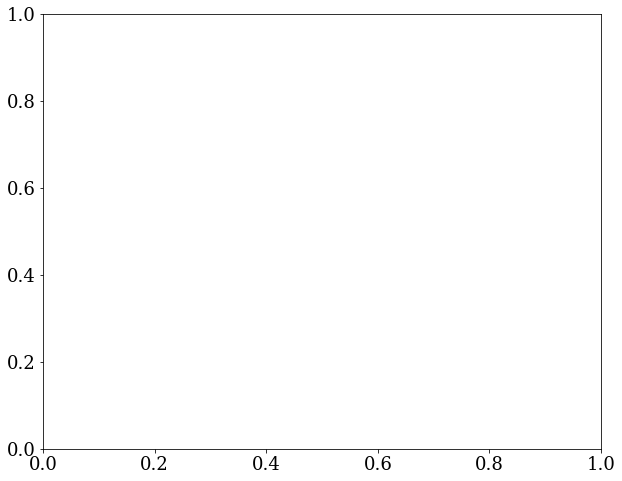

In [47]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)



# ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
# ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
# ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")



new_fa = np.arange(0.301, 0.7, 0.001)
new_fa_lam = np.arange(0.4, 0.6, 0.001)

plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_A$")
ax.set_title("diblock phase diagram, N = " + str(N) )

Text(0.5, 1.0, 'diblock phase diagram single wavemode,  phase min conditionals, N = 10000')

<Figure size 432x288 with 0 Axes>

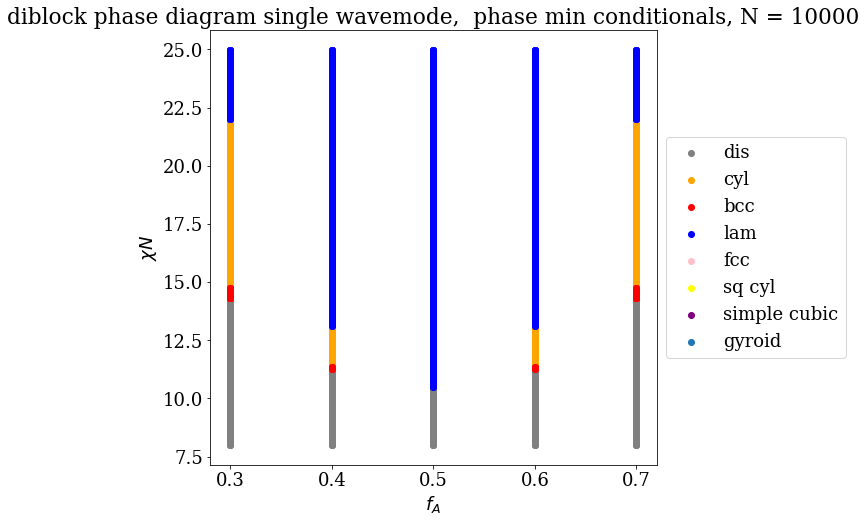

In [53]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")

ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyroid")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")



# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_A$")
ax.set_title("diblock phase diagram single wavemode,  phase min conditionals, N = " + str(N) )

Text(0.5, 1.0, 'diblock phase diagram single wavemode, N = 10000')

<Figure size 432x288 with 0 Axes>

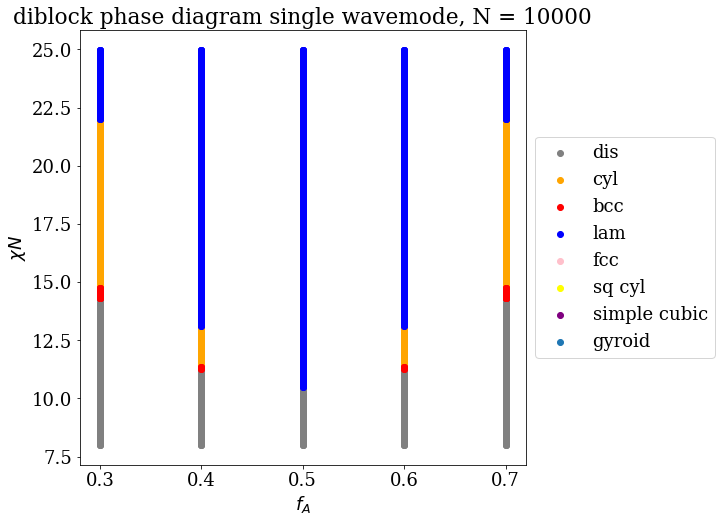

In [38]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")

ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyroid")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")



# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_A$")
ax.set_title("diblock phase diagram single wavemode, N = " + str(N) )

## structure factor comparisons

In [ ]:
#single point tests
N = 1000
FA = 0.7

N_m = 100
b = 1
M = 10
poly_mat = [0,0,0,0,0,0,0,1,1,1]
dens = [1.]


KS = spinodal(pset, N, FA)
q_star = KS[0]

q_star_gaus = find_kstar(poly_mat, dens, N_m, b, M)

q_star_gaus_new = spinodal_gaus(poly_mat, dens, N_m, b, M)

CHI = 10
lam_g2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, q_star_gaus_new, CHI)                

lam_g2_wlc = (1/2) * 2 * (1) * gamma2(pset, N, FA, q_star_gaus_new, CHI)                

In [ ]:

# sf2AA, sf2AB, sf2BB = calc_sf2(poly_mat, dens, N_m, b, k_vec = np.logspace(-2, 2, 50))
# sf2AA /= N**2
# sf2AB /= N**2
# sf2BB /= N**2


In [ ]:
sf2AA, sf2AB, sf2BB = calc_sf2(poly_mat, dens, N_m, b, k_vec)

In [ ]:
%%time
#VERTEX

N = 1000
FA = 0.7

N_m = 100
b = 1
M = 10
poly_mat = [0,0,0,0,0,0,0,1,1,1]
dens = [1.]

nk = 50
k_vec = np.logspace(-2, 2, nk)

sf2AA, sf2AB, sf2BB = calc_sf2(poly_mat, dens, N_m, b, k_vec)

s2_arr_vert_AA = np.zeros(nk)
s2_arr_vert_AB = np.zeros(nk)
s2_arr_vert_BB = np.zeros(nk)
for i in range(nk):
    Ks = k_vec[i]
    s2mat = s2wlc(pset, N, FA, Ks, sequence='all')
    Ks = k_vec[i]
    s2_arr_vert_AA[i] = s2mat[0][0]
    s2_arr_vert_AB[i] = s2mat[0][1]
    s2_arr_vert_BB[i] = s2mat[1][1]
    

In [ ]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(k_vec, sf2AA, label = "AA")
plt.plot(k_vec, sf2AB, label = "AB")
plt.plot(k_vec, sf2BB, label = "BB")

plt.plot(k_vec, s2_arr_vert_AA, label = "AA vert", linestyle = "--")
plt.plot(k_vec, s2_arr_vert_AB, label = "AB vert", linestyle = "--")
plt.plot(k_vec, s2_arr_vert_BB, label = "BB vert", linestyle = "--")

# plt.plot(k_vec, S2_BB_arr, label = "slow", linestyle = "--")
# plt.plot(k_vec, s2AA_stat, label = "wlcstat N = " + str(N))
# plt.plot(k_vec, debye_arr, label = "debye homo N = " + str(N), linestyle = "--")

plt.xscale('log')
plt.yscale('log')

# plt.title("S2")
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{2}(K;N)$')
plt.xlim((1e-2, 1e2))
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:

k0 = 1e-2
kf = 1e2
nk = 50
k_vec = np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

k1_vec = np.zeros((nk, 3))
k2_vec = np.zeros((nk, 3))
k3_vec = np.zeros((nk, 3))

k1_vec[:, 0] += np.logspace(np.log10(k0), np.log10(kf), nk)#*rg2**0.5

theta_1 = (2/3)*np.pi#2* np.pi * 1 / 3
theta_2 = 0#2*np.pi/3

frac = 1
k2_vec[:, 0] += frac * np.cos(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)
k2_vec[:, 1] += frac * np.sin(theta_1) * np.logspace(np.log10(k0), np.log10(kf), nk)

k3_vec[:, 0] += frac * np.cos(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)
k3_vec[:, 1] += frac * np.sin(theta_2) * np.logspace(np.log10(k0), np.log10(kf), nk)


k4_vec = - (k1_vec + k2_vec + k3_vec)

k1_val = np.sqrt(np.sum(k1_vec ** 2,axis = 1))
k2_val = np.sqrt(np.sum(k2_vec ** 2,axis = 1))
k3_val = np.sqrt(np.sum(k3_vec ** 2,axis = 1))

In [ ]:
N = 1000
FA = 0.7

N_m = 100
b = 1
M = 10
poly_mat = [0,0,0,0,0,0,0,1,1,1]
dens = [1.]

In [ ]:
%%time
#VERTEX

# FA = 0.75
# N = 400.
s3_arr_vert_AAA = np.zeros(nk)
s3_arr_vert_AAB = np.zeros(nk)
s3_arr_vert_ABB = np.zeros(nk)
s3_arr_vert_BBB = np.zeros(nk)

s3_arr_vert_ABA = np.zeros(nk)
s3_arr_vert_BAB = np.zeros(nk)
s3_arr_vert_BBA = np.zeros(nk)
s3_arr_vert_BAA = np.zeros(nk)

for i in range(nk):
#     Ks = k1_vec[i], k1_vec[i], -2*k1_vec[i]
    Ks = k1_vec[i], k2_vec[i], -k1_vec[i] - k2_vec[i]
#     Ks = k1_vec[i], -k1_vec[i], 0
    s3_mat = (s3wlc(pset, N, FA, Ks, sequence='all'))/N**3
    s3_arr_vert_AAA[i] = s3_mat[0][0][0]
    s3_arr_vert_AAB[i] = s3_mat[0][0][1]
    s3_arr_vert_ABA[i] = s3_mat[0][1][0]
    s3_arr_vert_BAA[i] = s3_mat[1][0][0]
    s3_arr_vert_ABB[i] = s3_mat[0][1][1]
    s3_arr_vert_BAB[i] = s3_mat[1][0][1]
    s3_arr_vert_BBA[i] = s3_mat[1][1][0]
    s3_arr_vert_BBB[i] = s3_mat[1][1][1]
# s4_arr_vert_BBBB[0] = s4_mat[1][1][1][1]

In [ ]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec[:n], sf3_homo[:n], label = "homo", linestyle = "-")

# plt.plot(k_vec, sf3_stat, label = "wlcstat homo")

color_wlc = "red"
color_gaus = "black"
plt.plot(k_vec[:], s3_arr_vert_AAA[:], label = "AAA wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], sf3_AAA[:], label = "AAA gaus", linestyle = "--", color = color_gaus, alpha = 0.5)




plt.plot(k_vec[:], s3_arr_vert_AAB[:], label = "AAB wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], sf3_AAB[:], label = "AAB gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s3_arr_vert_ABA[:], label = "ABA wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], sf3_ABA[:], label = "ABA gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s3_arr_vert_BAA[:], label = "BAA wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], sf3_BAA[:], label = "BAA gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s3_arr_vert_ABB[:], label = "ABB wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], sf3_ABB[:], label = "ABB gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s3_arr_vert_BAB[:], label = "BAB wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], sf3_BAB[:], label = "BAB gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s3_arr_vert_BBA[:], label = "BBA wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], sf3_BBA[:], label = "BBA gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s3_arr_vert_BBB[:], label = "BBB wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], sf3_BBB[:], label = "BBB gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.xscale('log')
plt.yscale('log')

plt.title(r"block copolymer, cylindrical k, $\theta_{k_1,k_2} = \frac{2 \pi}{3}$, N = " + str(N) + ", $f_A$ = " + str(FA))
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{3}(K;N)$')
plt.xlim((1e-2, 1e2))
plt.ylim((1e-10, 1e0))
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
N = 1000
FA = 0.7

N_m = 100
b = 1
M = 10
poly_mat = [0,0,0,0,0,0,0,1,1,1]
dens = [1.]

In [ ]:
%%time
# s4_AAAA, s4_AAAB, s4_AABB, s4_ABAB, s4_ABBA,\
#             s4_ABBB, s4_BABB, s4_BBAB, s4_BBBA, s4_BBBB = calc_sf4(poly_mat, dens, N_m, b, k1_vec[:], -k1_vec[:], k1_vec[:])

s4_mat = calc_sf4(poly_mat, dens, N_m, b, k1_vec[:], -k1_vec[:], k1_vec[:])

In [ ]:
%%time
#VERTEX

# FA = 0.75
# N = 400.
s4_arr_vert_AAAA = np.zeros(nk)
s4_arr_vert_AAAB = np.zeros(nk)
s4_arr_vert_AABB = np.zeros(nk)
s4_arr_vert_ABAB = np.zeros(nk)
s4_arr_vert_ABBA = np.zeros(nk)
s4_arr_vert_ABBB = np.zeros(nk)
s4_arr_vert_BABB = np.zeros(nk)
s4_arr_vert_BBAB = np.zeros(nk)
s4_arr_vert_BBBA = np.zeros(nk)
s4_arr_vert_BBBB = np.zeros(nk)

for i in range(nk):
    Ks = k1_vec[i], -k1_vec[i], k1_vec[i], -k1_vec[i]
#     Ks = k1_vec[i], -k1_vec[i], k2_vec[i], -k2_vec[i]
    s4_mat = (s4wlc(pset, wigset, N, FA, Ks, sequence='all'))
    s4_arr_vert_AAAA[i] = s4_mat[0][0][0][0]
    s4_arr_vert_AAAB[i] = s4_mat[0][0][0][1]
    s4_arr_vert_AABB[i] = s4_mat[0][0][1][1]
    s4_arr_vert_ABAB[i] = s4_mat[0][1][0][1]
    s4_arr_vert_ABBA[i] = s4_mat[0][1][1][0]
    s4_arr_vert_ABBB[i] = s4_mat[0][1][1][1]
    s4_arr_vert_BABB[i] = s4_mat[1][0][1][1]
    s4_arr_vert_BBAB[i] = s4_mat[1][1][0][1]
    s4_arr_vert_BBBA[i] = s4_mat[1][1][1][0]
    s4_arr_vert_BBBB[i] = s4_mat[1][1][1][1]

In [ ]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# plt.plot(k_vec[:n], s4_homo[:n], label = "homo", linestyle = "-")

# plt.plot(k_vec, s4_stat, label = "wlcstat homo")

color_wlc = "red"
color_gaus = "black"
plt.plot(k_vec[:], s4_arr_vert_AAAA[:], label = "AAAA wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], s4_AAAA[:], label = "AAAA gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s4_arr_vert_AAAB[:], label = "AAAB wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], s4_AAAB[:], label = "AAAB gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s4_arr_vert_AABB[:], label = "AABB wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], s4_AABB[:], label = "AABB gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s4_arr_vert_ABAB[:], label = "ABAB wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], s4_ABAB[:], label = "ABAB gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s4_arr_vert_ABBA[:], label = "ABBA wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], s4_ABBA[:], label = "ABBA gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s4_arr_vert_ABBB[:], label = "ABBB wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], s4_ABBB[:], label = "ABBB gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s4_arr_vert_BABB[:], label = "BABB wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], s4_BABB[:], label = "BABB gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s4_arr_vert_BBAB[:], label = "BBAB wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], s4_BBAB[:], label = "BBAB gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s4_arr_vert_BBBA[:], label = "BBBA wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], s4_BBBA[:], label = "BBBA gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.plot(k_vec[:], s4_arr_vert_BBBB[:], label = "BBBB wlc", linestyle = "-", color = color_wlc)

plt.plot(k_vec[:], s4_BBBB[:], label = "BBBB gaus", linestyle = "--", color = color_gaus, alpha = 0.5)


plt.xscale('log')
plt.yscale('log')

plt.title(r"block copolymer, $k_1, -k_1, k_2, -k_2, \theta_{k_1,k_2} = \frac{2 \pi}{3}$, N = " + str(N) + ", $f_A$ = " + str(FA))
plt.xlabel(r'$K$')
plt.ylabel(r'Structure Factor $S_{4}(K;N)$')
plt.xlim((1e-2, 1e2))
# plt.ylim((1e-10, 1e0))
plt.tight_layout()
plt.legend()
plt.show()

## OLD CODE

In [ ]:
%%time
#SINGLE WAVEMODE PHASE DIAGRAM    NO GYROID 
N = 10000

# fa_array = np.arange(0.3, 0.501, 0.01)#[0.3, 0.325, 0.35, 0.375, 0.3875, 0.4, 0.4125, 0.425, 0.4375, 0.45, 0.475, 0.5]#[0.3, 0.35, 0.4, 0.45, 0.5]#np.arange(0.2, 0.51, .02)
chi_array = np.arange(8, 25, .01)/N#np.arange(5, 30, 0.5)/N #np.array([5, 7, 10, 12, 15, 17, 20])/N #* N

N_m = 1000
b = 1
M = 10

fa_array = [0.3, 0.4, 0.5, 0.6, 0.7]
poly_type = "diblock"
n_p = 1

lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

for FA in fa_array:
    poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 
    
    q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
    q_star = q_star[0]
    
    lam_q = q_star*np.array([1, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])

    sq_cyl_q1 = q_star * np.array([1,0,0])
    sq_cyl_q2 = q_star * np.array([0,1,0])
    
    sim_cub_q1 = q_star * np.array([1,0,0])
    sim_cub_q2 = q_star * np.array([0,1,0])
    sim_cub_q3 = q_star * np.array([0,0,1])
    
    fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
    fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
    fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
    fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    
    G3 = gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs) # all g3s are eqivlaent
    lam_g3 = 0
    cyl_g3 = -(1/6) * (1/(3*np.sqrt(3))) * 12 * G3
    bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(poly_mat, dens, N_m, b, M, np.array([bcc_q6, bcc_q3, -bcc_q1]))
    gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    sq_cyl_g3 = 0
    sim_cub_g3 = 0
    fcc_g3 = 0
    
    G4_00 = gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    cyl_g4 = (1/12)* (gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1 , -cyl_q1 , cyl_q1 , -cyl_q1 ])) + \
              4*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    bcc_g4 = (1/24)* (gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q1, -bcc_q1])) \
                     + 8*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    gyr_g4 = (1/24)* (1/(12*12)) * (72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q1, gyr_q1, -gyr_q1])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    sq_cyl_g4 = (1/24) * (1/4) * (12*gamma4_E(poly_mat, dens, N_m, b, M, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q1 , -sq_cyl_q1 ])) + \
                                  24*gamma4_E(poly_mat, dens, N_m, b, M, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ])))
    sim_cub_g4 = (1/24) * (1/9) * (18*gamma4_E(poly_mat, dens, N_m, b, M, np.array([sim_cub_q1, -sim_cub_q1, sim_cub_q1, -sim_cub_q1]))+ \
                                   72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([sim_cub_q1, -sim_cub_q1, sim_cub_q2, -sim_cub_q2])))
    fcc_g4 = (1/24) * (1/16) * (24*gamma4_E(poly_mat, dens, N_m, b, M, np.array([fcc_q1, -fcc_q1, fcc_q1, -fcc_q1]))\
                                + 144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                - 48*gamma4_E(poly_mat, dens, N_m, b, M, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)                
        cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
        bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
        gyr_g2 = lam_g2
        sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
        sim_cub_g2 = lam_g2
        fcc_g2 = lam_g2
        
        amp_l1 = optimize.fmin(lambda amps: np.real(amps**2 * lam_g2 + amps**3 * lam_g3 + amps**4 * lam_g4), \
                              1, disp=False)
        amp_c1 = optimize.fmin(lambda amps: np.real(amps**2 * cyl_g2 + amps**3 * cyl_g3 + amps**4 * cyl_g4), \
                              1, disp=False)
        amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
                              1, disp=False)
        amp_g1 = optimize.fmin(lambda amps: np.real(amps**2 * gyr_g2 + amps**3 * gyr_g3 + amps**4 * gyr_g4), \
                              1, disp=False)
        amp_sq_c1 = optimize.fmin(lambda amps: np.real(amps**2 * sq_cyl_g2 + amps**3 * sq_cyl_g3 + amps**4 * sq_cyl_g4), \
                              1, disp=False)
        amp_sim_cub1 = optimize.fmin(lambda amps: np.real(amps**2 * sim_cub_g2 + amps**3 * sim_cub_g3 + amps**4 * sim_cub_g4), \
                              1, disp=False)
        amp_fcc1 = optimize.fmin(lambda amps: np.real(amps**2 * fcc_g2 + amps**3 * fcc_g3 + amps**4 * fcc_g4), \
                              1, disp=False)

        
        lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 
        cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 
        bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4
        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4
        sq_cylF = amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 
        sim_cubF = amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 
        fccF = amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4
        
        point = np.array([FA, CHI*N])
        
        minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
        if minF > 0:
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == sq_cylF:
            sq_cyl_pnts = np.append(sq_cyl_pnts, point)
        elif minF == sim_cubF:
            sim_cub_pnts = np.append(sim_cub_pnts, point)
        elif minF == fccF:
            fcc_pnts = np.append(fcc_pnts, point)
        else:
            raise Exception("error in min F phase assignment")
            
    print("one FA done!!")
            

In [ ]:
np.sum(np.round(sf3_BBB[:P], 7) == np.round(sf3_BBB_OLD[:P], 7))/P

In [ ]:
# def calc_sf3(poly_mat, dens, N_m, b, k_vec, k_vec_2):
#     # for a gaussian chain of M monomers, each of length N_m
#     # TODO: possible issue with non-cylindrical integrals
#     M3_AAA = calc_monomer_matrix_3(poly_mat, dens)
#     M = np.shape(M3_AAA)[0]
#     nk = len(k_vec)

#     grid = np.indices((M,M,M))
#     j1 = grid[0]
#     j2 = grid[1]
#     j3 = grid[2]
    
#     S3_AAA_arr =  np.zeros(nk)
#     S3_BAA_arr = np.zeros(nk)
#     S3_BBA_arr = np.zeros(nk)
#     S3_BBB_arr = np.zeros(nk)
    
#     S3_ABA_arr = np.zeros(nk)
#     S3_BAB_arr = np.zeros(nk)
    
#     S3_AAB_arr = np.zeros(nk)
#     S3_ABB_arr = np.zeros(nk)

    
#     M3_BAA = M3_AAA[j2, j2, j3] - M3_AAA
#     M3_BBA = M3_AAA + M3_BAA[j1, j3, j3] - M3_AAA[j2,j2,j3]
#     M3_BBB = 1  - M3_AAA[j1, j1, j1] - M3_BAA[j1, j2, j2] - M3_BAA[j1, j3, j3] + M3_AAA[j2,j2,j3] - M3_AAA
    
#     #i think unique
#     M3_ABA = M3_AAA[j1,j1,j3] - M3_AAA
#     M3_BAB = M3_AAA[j2,j2,j2] - M3_AAA[j2,j2,j3] - M3_AAA[j1,j2,j2] + M3_AAA
    
#     #i think degenerate
#     M3_AAB = M3_AAA[j1, j1, j2] - M3_AAA
#     M3_ABB = M3_AAA[j1,j1,j1] - M3_AAA[j1,j1,j2] - M3_AAA[j1,j1,j3] + M3_AAA

#     for i, k_1 in enumerate(k_vec):
#         k_2 = k_vec_2[i]
#         k_12 = k_1 + k_2
        
#         # CASE 1; kA = k1 + k2, kB = k_1; S3 > S2 > S1 and S1 > S2 > S3
#         case1 = [[k_12, k_1], [j3, j2, j1]]
#         # CASE 2; kA = k2, kB = k1 + k2; S2 > S1 > S3 and S3 > S1 > S2
#         case2 = [[k_2, k_12], [j2, j1, j3]]
#         # CASE 3; kA = k2, kB = -k1; S2 > S3 > S1 and S1 > S3 > S2
#         case3 = [[k_2, -k_1], [j2, j3, j1]]
        
#         case_arr = [case1, case2, case3]
# #        for each case and sub case, add to a matrix C(j1, j2, j3) which contains the contribution to the overall S3
# #        then sum over all indices. Need to keep track of js so that aproiate multiplications with cross corr matrix M3        
#         C = np.zeros((M,M,M))

#         for cse in case_arr:
#             kA, kB = cse[0]
#             ordered_js = cse[1]
            
#             xm_A = (1/6) * N_m * b**2 * np.linalg.norm(kA)**2
#             xm_B = (1/6) * N_m * b**2 * np.linalg.norm(kB)**2
            
#             C = calc_case_deg(C, xm_A, xm_B, ordered_js)
        
#         S3_AAA_arr[i] += np.sum((1/M**3) * M3_AAA * C)*(N**3)
#         S3_BAA_arr[i] += np.sum((1/M**3) * M3_BAA * C)*(N**3)
#         S3_BBA_arr[i] += np.sum((1/M**3) * M3_BBA * C)*(N**3)
#         S3_BBB_arr[i] += np.sum((1/M**3) * M3_BBB * C)*(N**3)
        
#         S3_ABA_arr[i] += np.sum((1/M**3) * M3_ABA * C)*(N**3)
#         S3_BAB_arr[i] += np.sum((1/M**3) * M3_BAB * C)*(N**3)
        
#         S3_AAB_arr[i] += np.sum((1/M**3) * M3_AAB * C)*(N**3)
#         S3_ABB_arr[i] += np.sum((1/M**3) * M3_ABB * C)*(N**3)

#     return S3_AAA_arr, S3_AAB_arr, S3_ABA_arr, S3_BAA_arr, S3_ABB_arr, S3_BAB_arr,  S3_BBA_arr, S3_BBB_arr

# def calc_case_deg(C, xm_A, xm_B, ordered_js):

#     jmax, jmid, jmin = ordered_js
#     ordered_js.reverse()
#     jmax_d, jmid_d, jmin_d = ordered_js
    
#     cylindrical = False
#     epsilon = 0.0000001
#     if xm_A + epsilon > xm_B and xm_A - epsilon < xm_B:
#         cylindrical = True
    
#     xm_A_eq_0 = False
#     if xm_A < 1e-5:
#         xm_A_eq_0 = True
        
#     xm_B_eq_0 = False
#     if xm_B < 1e-5:
#         xm_B_eq_0 = True
                
#     #for each sub case, looking at the degenerate case where 1 and 2 are switched
#     constant = np.exp(-xm_A*(jmax - jmid)) * np.exp(-xm_B*(jmid - jmin)) 
#     constant_deg = np.exp(-xm_B*(jmax_d - jmid_d)) * np.exp(-xm_A*(jmid_d - jmin_d))

#     # sub case 1; jmax > jmid > jmin, {s1, s2, s3} any 
#     index = (jmax > jmid) * (jmid > jmin)
#     index_deg = (jmax_d > jmid_d) * (jmid_d > jmin_d) #degeneracy
    
#     if cylindrical == True:
#         integral = (1 / xm_A**2) * 2 * (-1 + np.cosh(xm_A))
#         integral_deg = integral
#     elif xm_B_eq_0:
#         integral = (2*(-1+np.cosh(xm_A)))/ (xm_A**2)
#         integral_deg = (2*(-1+np.cosh(xm_A)))/ (xm_A**2)
#     elif xm_A_eq_0:
#         integral = (2*(-1+np.cosh(xm_B)))/ (xm_B**2)
#         integral_deg = (2*(-1+np.cosh(xm_B)))/ (xm_B**2)
#     else:
#         integral = (-2 / (xm_A * (xm_A - xm_B) * xm_B)) \
#         * (-np.sinh(xm_A) + np.sinh(xm_A - xm_B) + np.sinh(xm_B))
#         integral_deg = (-2 / (xm_B * (xm_B - xm_A) * xm_A)) \
#         * (-np.sinh(xm_B) + np.sinh(xm_B - xm_A) + np.sinh(xm_A))

#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
#     C[np.where((index_deg) != 0)] += constant_deg[np.where(index_deg != 0)] \
#                                     * integral_deg 
    
#     # sub case 2; jmax = jmid > jmin, s3 > s2, {s1} any
#     index = (jmax == jmid) * (jmid > jmin)
#     index_deg = (jmax_d == jmid_d) * (jmid_d > jmin_d) #degeneracy
    
#     if cylindrical == True:
#         integral = (1 / xm_A**3) *( (2 + xm_A) * (-1 + np.cosh(xm_A)) - (xm_A * np.sinh(xm_A)) )
#         integral_deg = integral
#     elif xm_B_eq_0:
#         integral = (-1 + xm_A + np.cosh(xm_A) - np.sinh(xm_A))/ (xm_A**2)
#         integral_deg = (np.exp(-xm_A)*(-1 + np.exp(xm_A))*(1+np.exp(xm_A)*(-1 + xm_A))) / (xm_A**3) 
#     elif xm_A_eq_0:
#         integral = (np.exp(-xm_B)*(-1 + np.exp(xm_B))*(1+np.exp(xm_B)*(-1 + xm_B))) / (xm_B**3) 
#         integral_deg = (-1 + xm_B + np.cosh(xm_B) - np.sinh(xm_B))/ (xm_B**2)
#     else:
#         integral = ((-1 + np.exp(xm_B))/(xm_A * (xm_A - xm_B)*xm_B**2)) \
#         * (xm_A + (-1 + np.exp(-xm_A))*xm_B - xm_A*np.cosh(xm_B) + xm_A*np.sinh(xm_B))
#         integral_deg = ((-1 + np.exp(xm_A))/(xm_B * (xm_B - xm_A)*xm_A**2)) \
#         * (xm_B + (-1 + np.exp(-xm_B))*xm_A - xm_B*np.cosh(xm_A) + xm_B*np.sinh(xm_A))

#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
    
#     C[np.where((index_deg) != 0)] += constant_deg[np.where(index_deg != 0)] \
#                                     * integral_deg 

#     # BONUS sub case 4; jmax > jmid = jmin, s2 > s1, {s3} any 
#     index = (jmax > jmid) * (jmid == jmin)
#     index_deg = (jmax_d > jmid_d) * (jmid_d == jmin_d)
    
#     if cylindrical == True:
#         integral = (1 / xm_A**3) *( (2 + xm_A) * (-1 + np.cosh(xm_A)) - (xm_A * np.sinh(xm_A)) )
#         integral_deg = integral
#     elif xm_B_eq_0:
#         integral = ((-2+xm_A)*(-1+np.cosh(xm_A))+ (xm_A*np.sinh(xm_A)))/ (xm_A**3)
#         integral_deg = (-1+xm_A+np.cosh(xm_A) - np.sinh(xm_A))/ (xm_A**2)
#     elif xm_A_eq_0:
#         integral = (-1+xm_B+np.cosh(xm_B) - np.sinh(xm_B))/ (xm_B**2)
#         integral_deg = ((-2+xm_B)*(-1+np.cosh(xm_B))+ (xm_B*np.sinh(xm_B)))/ (xm_B**3)
#     else:
#         integral = (((-1 + np.exp(xm_A))*(np.exp(-xm_A - xm_B)))/(xm_B * (xm_A - xm_B)*xm_A**2)) \
#         * (-np.exp(xm_A)*xm_A + np.exp(xm_A + xm_B) * (xm_A -xm_B) + np.exp(xm_B)*xm_B)
#         integral_deg = (((-1 + np.exp(xm_B))*(np.exp(-xm_B - xm_A)))/(xm_A * (xm_B - xm_A)*xm_B**2)) \
#         * (-np.exp(xm_B)*xm_B + np.exp(xm_B + xm_A) * (xm_B -xm_A) + np.exp(xm_A)*xm_A)

#     C[np.where((index) != 0)] += constant[np.where(index != 0)] \
#                                     * integral
    
#     C[np.where((index_deg) != 0)] += constant_deg[np.where(index_deg != 0)] \
#                                     * integral_deg 

#     # sub case 3; jmax = jmid = jmin, s3 > s2 > s1
#     index = (jmax == jmid) * (jmid == jmin)
#     index_deg = (jmax == jmid) * (jmid == jmin)

#     if cylindrical == True:
#         integral = (1 / xm_A**3) * (np.exp(-xm_A) * (2 + np.exp(xm_A)*(-2 + xm_A) + xm_A))
#         integral_deg = integral
#     elif xm_B_eq_0:
#         integral = (2-2*np.exp(-xm_A) - 2*xm_A + xm_A**2)/ (2*xm_A**3)
#         integral_deg = integral
#     elif xm_A_eq_0:
#         integral = (2-2*np.exp(-xm_B) - 2*xm_B + xm_B**2)/ (2*xm_B**3)
#         integral_deg = integral
#     else:
#         integral = (1 / (xm_A**2 * xm_B - xm_A * xm_B**2))\
#         * ( xm_A + (((-1 + np.exp(-xm_B)) * xm_A)/(xm_B)) - xm_B + ((xm_B - np.exp(-xm_A)*xm_B)/(xm_A)) )
#         integral_deg = (1 / (xm_B**2 * xm_A - xm_B * xm_A**2))\
#         * ( xm_B + (((-1 + np.exp(-xm_A)) * xm_B)/(xm_A)) - xm_A + ((xm_A - np.exp(-xm_B)*xm_A)/(xm_B)) )

#     C[np.where(index != 0)] += 1\
#                                     * constant[np.where(index != 0)]\
#                                     * integral

# #                                     * 2 # degeneracy
#     C[np.where(index_deg != 0)] += 1\
#                                     * constant_deg[np.where(index_deg != 0)]\
#                                     * integral_deg

#     return C



In [ ]:
def calc_sf3(poly_mat, dens, N_m, b, k_vec, k_vec_2):
    # for a gaussian chain of M monomers, each of length N_m
    
    M3_AAA = calc_monomer_matrix_3(poly_mat, dens)
    M = np.shape(M3_AAA)[0]
    nk = len(k_vec)
    N = M*N_m

    grid = np.indices((M,M,M))
    j1 = grid[0]
    j2 = grid[1]
    j3 = grid[2]
    
    S3_AAA_arr =  np.zeros(nk)
    S3_BAA_arr = np.zeros(nk)
    S3_BBA_arr = np.zeros(nk)
    S3_BBB_arr = np.zeros(nk)
    
    S3_ABA_arr = np.zeros(nk)
    S3_BAB_arr = np.zeros(nk)
    
    S3_AAB_arr = np.zeros(nk)
    S3_ABB_arr = np.zeros(nk)

    
    M3_BAA = M3_AAA[j2, j2, j3] - M3_AAA
    M3_BBA = M3_AAA + M3_BAA[j1, j3, j3] - M3_AAA[j2,j2,j3]
    M3_BBB = 1  - M3_AAA[j1, j1, j1] - M3_BAA[j1, j2, j2] - M3_BAA[j1, j3, j3] + M3_AAA[j2,j2,j3] - M3_AAA
    
    M3_ABA = M3_AAA[j1,j1,j3] - M3_AAA
    M3_BAB = M3_AAA[j2,j2,j2] - M3_AAA[j2,j2,j3] - M3_AAA[j1,j2,j2] + M3_AAA
    M3_AAB = M3_AAA[j1, j1, j2] - M3_AAA
    M3_ABB = M3_AAA[j1,j1,j1] - M3_AAA[j1,j1,j2] - M3_AAA[j1,j1,j3] + M3_AAA
    
    
    for i, k_1 in enumerate(k_vec):
        k_2 = k_vec_2[i]
        k_12 = k_1 + k_2

        # CASE 1; kA = k1 + k2, kB = k_1; S3 > S2 > S1 and S1 > S2 > S3
        case1 = [[k_12, k_1], [j3, j2, j1]]

        # CASE 2; kA = k2, kB = k1 + k2; S2 > S1 > S3 and S3 > S1 > S2
        case2 = [[k_2, k_12], [j2, j1, j3]]
        
        # CASE 3; kA = k2, kB = -k1; S2 > S3 > S1 and S1 > S3 > S2
        case3 = [[k_2, -k_1], [j2, j3, j1]]
        
        case_arr = [case1, case2, case3]#, case1deg, case2deg, case3deg]
        # need to consider degenerate cases. flipping each element in array, then appending to original case array
        case_arr = np.vstack((case_arr, [[np.flipud(el) for el in cse] for cse in case_arr]))
        
#        for each case and sub case, add to a matrix C(j1, j2, j3) which contains the contribution to the overall S3
#        then sum over all indices. Need to keep track of js so that aproiate multiplications with cross corr matrix M3        
        C = np.zeros((M,M,M))

        for cse in case_arr:
            kA, kB = cse[0]
            ordered_js = cse[1]
            
            xm_A = (1/6) * N_m * b**2 * np.linalg.norm(kA)**2
            xm_B = (1/6) * N_m * b**2 * np.linalg.norm(kB)**2
            
            C = calc_case(C, xm_A, xm_B, ordered_js)
    
        S3_AAA_arr[i] += np.sum((1/M**3) * M3_AAA * C)*(N**3)
        S3_BAA_arr[i] += np.sum((1/M**3) * M3_BAA * C)*(N**3)
        S3_BBA_arr[i] += np.sum((1/M**3) * M3_BBA * C)*(N**3)
        S3_BBB_arr[i] += np.sum((1/M**3) * M3_BBB * C)*(N**3)
        
        S3_ABA_arr[i] += np.sum((1/M**3) * M3_ABA * C)*(N**3)
        S3_BAB_arr[i] += np.sum((1/M**3) * M3_BAB * C)*(N**3)
        
        S3_AAB_arr[i] += np.sum((1/M**3) * M3_AAB * C)*(N**3)
        S3_ABB_arr[i] += np.sum((1/M**3) * M3_ABB * C)*(N**3)

    return S3_AAA_arr, S3_AAB_arr, S3_ABA_arr, S3_BAA_arr, S3_ABB_arr, S3_BAB_arr,  S3_BBA_arr, S3_BBB_arr

def calc_case(C, xm_A, xm_B, ordered_js):

    jmax, jmid, jmin = ordered_js
    
    cylindrical = False
    epsilon = 0.0000001
    if xm_A + epsilon > xm_B and xm_A - epsilon < xm_B:
        cylindrical = True
    
    xm_A_eq_0 = False
    if xm_A < 1e-5:
        xm_A_eq_0 = True
        
    xm_B_eq_0 = False
    if xm_B < 1e-5:
        xm_B_eq_0 = True

    #for each sub case, looking at the degenerate case where 1 and 2 are switched
    constant = np.exp(-xm_A*(jmax - jmid)) * np.exp(-xm_B*(jmid - jmin)) 

    # sub case 1; jmax > jmid > jmin, {s1, s2, s3} any 
    index = (jmax > jmid) * (jmid > jmin)
    
    if cylindrical == True:
        integral = (1 / xm_A**2) * 2 * (-1 + np.cosh(xm_A))
    elif xm_B_eq_0:
        integral = (2*(-1+np.cosh(xm_A)))/ (xm_A**2)
    elif xm_A_eq_0:
        integral = (2*(-1+np.cosh(xm_B)))/ (xm_B**2)
    else:
        integral = (-2 / (xm_A * (xm_A - xm_B) * xm_B)) \
        * (-np.sinh(xm_A) + np.sinh(xm_A - xm_B) + np.sinh(xm_B))

    C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral
    
    # sub case 2; jmax = jmid > jmin, s3 > s2, {s1} any
    index = (jmax == jmid) * (jmid > jmin)
    
    if cylindrical == True:
        integral = (1 / xm_A**3) *( (2 + xm_A) * (-1 + np.cosh(xm_A)) - (xm_A * np.sinh(xm_A)) )
    elif xm_B_eq_0:
        integral = (-1 + xm_A + np.cosh(xm_A) - np.sinh(xm_A))/ (xm_A**2)
    elif xm_A_eq_0:
        integral = (np.exp(-xm_B)*(-1 + np.exp(xm_B))*(1+np.exp(xm_B)*(-1 + xm_B))) / (xm_B**3)   
    else:
        integral = ((-1 + np.exp(xm_B))/(xm_A * (xm_A - xm_B)*xm_B**2)) \
        * (xm_A + (-1 + np.exp(-xm_A))*xm_B - xm_A*np.cosh(xm_B) + xm_A*np.sinh(xm_B))

    C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral 

    # BONUS sub case 4; jmax > jmid = jmin, s2 > s1, {s3} any 
    index = (jmax > jmid) * (jmid == jmin)
    
    if cylindrical == True:
        integral = (1 / xm_A**3) *( (2 + xm_A) * (-1 + np.cosh(xm_A)) - (xm_A * np.sinh(xm_A)) )
    elif xm_B_eq_0:
        integral = ((-2+xm_A)*(-1+np.cosh(xm_A))+ (xm_A*np.sinh(xm_A)))/ (xm_A**3)
    elif xm_A_eq_0:
        integral = (-1+xm_B+np.cosh(xm_B) - np.sinh(xm_B))/ (xm_B**2)
    else:
        integral = (((-1 + np.exp(xm_A))*(np.exp(-xm_A - xm_B)))/(xm_B * (xm_A - xm_B)*xm_A**2)) \
        * (-np.exp(xm_A)*xm_A + np.exp(xm_A + xm_B) * (xm_A -xm_B) + np.exp(xm_B)*xm_B)

    C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral 

    # sub case 3; jmax = jmid = jmin, s3 > s2 > s1
    index = (jmax == jmid) * (jmid == jmin)

    if cylindrical == True:
        integral = (1 / xm_A**3) * (np.exp(-xm_A) * (2 + np.exp(xm_A)*(-2 + xm_A) + xm_A))
    elif xm_B_eq_0:
        integral = (2-2*np.exp(-xm_A) - 2*xm_A + xm_A**2)/ (2*xm_A**3)
    elif xm_A_eq_0:
        integral = (2-2*np.exp(-xm_B) - 2*xm_B + xm_B**2)/ (2*xm_B**3)
    else:
        integral = (1 / (xm_A**2 * xm_B - xm_A * xm_B**2))\
        * ( xm_A + (((-1 + np.exp(-xm_B)) * xm_A)/(xm_B)) - xm_B + ((xm_B - np.exp(-xm_A)*xm_B)/(xm_A)) )

    C[np.where(index != 0)] += 1\
                                    * constant[np.where(index != 0)]\
                                    * integral \
    return C


In [ ]:
def calc_sf_old(poly_mat, dens, N_m, b, k_vec, k_vec_2, k_vec_3):
    M4_AAAA = calc_monomer_matrix_4(poly_mat, dens)
    M = np.shape(M4_AAAA)[0]
    nk = len(k_vec)

    grid = np.indices((M,M,M,M))
    j1 = grid[0]
    j2 = grid[1]
    j3 = grid[2]
    j4 = grid[3]
    
    S4_AAAA_arr = np.zeros(nk)
    S4_AAAB_arr = np.zeros(nk)
    S4_AABB_arr = np.zeros(nk)
    S4_ABBB_arr = np.zeros(nk)
    S4_BBBB_arr = np.zeros(nk)
    
    M4_BAAA = M4_AAAA[j2, j2, j3, j4] - M4_AAAA
    M4_BBAA = M4_BAAA[j1, j3, j3, j4] - M4_BAAA
    M4_BBBA = M4_BBAA[j1, j2, j4, j4] - M4_BBAA
    M4_BBBB = 1 - M4_AAAA[j1, j1, j1, j1] - M4_AAAA[j2, j2, j2, j2] - M4_AAAA[j3, j3, j3, j3]  + M4_AAAA[j1, j1, j3, j3]\
    + M4_AAAA[j2, j2, j3, j3] + M4_AAAA[j1, j1, j2, j2] - M4_AAAA[j1, j2, j3, j3] - M4_BBBA

    for i, k1 in enumerate(k_vec):
        k2 = k_vec_2[i]
        k3 = k_vec_3[i]
        k12 = k1 + k2
        k13 = k1 + k3
        k23 = k2 + k3
        k123 = k1 + k2 + k3
        
        # CASE 1; kA = k1 + k2 + k3; kB = k_1 + k_2; kC = k_1  S4 > S3 > S2 > S1 (and reverse). All cases on wlcstat
        case1 = [[k123, k12, k1], [j4, j3, j2, j1]]
        case2 = [[k123, k12, k2], [j4, j3, j1, j2]]
        case3 = [[k123, k13, k1], [j4, j2, j3, j1]]
        case4 = [[k123, k23, k2], [j4, j1, j3, j2]]
        case5 = [[k123, k13, k3], [j4, j2, j1, j3]]
        case6 = [[k123, k23, k3], [j4, j1, j2, j3]]
        case7 = [[-k3, k12, k1], [j3, j4, j2, j1]]
        case8 = [[-k3, k12, k2], [j3, j4, j1, j2]]
        case9 = [[-k2, k13, k1], [j2, j4, j3, j1]]
        case10 = [[-k1, k23, k2], [j1, j4, j3, j2]]
        case11 = [[-k2, k13, k3], [j2, j4, j1, j3]]
        case12 = [[-k1, k23, k3], [j1, j4, j2, j3]]
        
        case_arr = [case1, case2, case3, case4, case5, case6, \
                   case7, case8, case9, case10, case11, case12]
        
        C = np.zeros((M,M,M,M))
        for cse in case_arr:
            kA, kB, kC = cse[0]
            ordered_js = cse[1]
            
            xm_A = (1/6) * N_m * b**2 * np.linalg.norm(kA)**2
            xm_B = (1/6) * N_m * b**2 * np.linalg.norm(kB)**2
            xm_C = (1/6) * N_m * b**2 * np.linalg.norm(kC)**2
            
            print("xm_A")
            print(xm_A)
            print("xm_B")
            print(xm_B)
            print("xm_C")
            print(xm_C)
            C = calc_case_s4_old(C, xm_A, xm_B, xm_C, ordered_js) 
            
        S4_AAAA_arr[i] += np.sum((1/M**4) * M4_AAAA * C)
        S4_AAAB_arr[i] += np.sum((1/M**4) * M4_BAAA * C)
        S4_AABB_arr[i] += np.sum((1/M**4) * M4_BBAA * C)
        S4_ABBB_arr[i] += np.sum((1/M**4) * M4_BBBA * C)
        S4_BBBB_arr[i] += np.sum((1/M**4) * M4_BBBB * C)
        
    return S4_AAAA_arr, S4_AAAB_arr, S4_AABB_arr, S4_ABBB_arr, S4_BBBB_arr 


def calc_case_s4_old(C, xm_A, xm_B, xm_C, ordered_js):

    jmax, jupp, jlow, jmin = ordered_js
    ordered_js.reverse()
    jmax_d, jupp_d, jlow_d, jmin_d = ordered_js
    
    xmA_eq_xmB = False
    xmA_eq_xmC = False
    xmB_eq_xmC = False
    epsilon = 0.0000001
    if xm_A + epsilon > xm_B and xm_A - epsilon < xm_B:
        xmA_eq_xmB = True
    if xm_A + epsilon > xm_C and xm_A - epsilon < xm_C:
        xmA_eq_xmC = True
    if xm_B + epsilon > xm_C and xm_B - epsilon < xm_C:
        xmB_eq_xmC = True
#     print("xmA_eq_xmB")
#     print(xmA_eq_xmB)
#     print("xmA_eq_xmC")
#     print(xmA_eq_xmC)
#     print("xmB_eq_xmC")
#     print(xmB_eq_xmC)

    #for each sub case, looking at the degenerate case where 1 and 2 are switched
    constant = np.exp(-xm_A*(jmax - jupp)- xm_B*(jupp - jlow) - xm_C*(jlow - jmin))
    constant_deg = np.exp(-xm_A*(jmax_d - jupp_d)- xm_B*(jupp_d - jlow_d) - xm_C*(jlow_d - jmin_d))

    # sub case 1; jmax > jupp > jlow > jmin, {s1234} any
    index = (jmax > jupp) * (jupp > jlow) * (jlow > jmin)
    index_deg = (jmax_d > jupp_d) * (jupp_d > jlow_d) * (jlow_d > jmin_d)

    if xmA_eq_xmB and xmB_eq_xmC:
        integral = 2*(-1 + np.cosh(xm_A)) / xm_A**2
    elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
        integral = (16*np.sinh(xm_A / 2) * np.sinh((xm_A - xm_B)/2) * np.sinh((xm_B - xm_C)/2) * np.sinh(xm_C/2))\
                    / (xm_A * (xm_A - xm_B) * (xm_B - xm_C) * xm_C)
    elif xmA_eq_xmB:
        integral = -(2 / (xm_A*xm_C*(xm_A - xm_C))) * \
                    (-np.sinh(xm_A) + np.sinh(xm_A - xm_C) + np.sinh(xm_C))
    elif xmB_eq_xmC:
        integral = -(2 / (xm_A*xm_B*(xm_A - xm_B))) * \
                    (-np.sinh(xm_A) + np.sinh(xm_A - xm_B) + np.sinh(xm_B))
    elif xmA_eq_xmC:
        integral = (16 / (xm_A**2 * (xm_A - xm_B)**2) )* \
                    np.sinh(xm_A / 2)**2 *np.sinh((xm_A - xm_B) / 2)**2
#     print("subcase 1")
#     print(constant[np.where(index != 0)] \
#                                     * integral)
    C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral
    
    C[np.where((index_deg) != 0)] += constant_deg[np.where(index_deg != 0)] \
                                    * integral 
    
    # sub case 2; jmax = jupp > jlow > jmin
    index = (jmax == jupp) * (jupp > jlow) * (jlow > jmin)
    index_deg = (jmax_d == jupp_d) * (jupp_d > jlow_d) * (jlow_d > jmin_d)

    if xmA_eq_xmB and xmB_eq_xmC:
        integral = (np.exp(-xm_A) * (-1 + np.exp(xm_A)) * (-1 + np.exp(xm_A) - xm_A))\
        / (xm_A**3)
    elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
        integral = ((np.exp(-xm_A-xm_B-xm_C)) * (-1+np.exp(xm_C)) * (-np.exp(xm_B)+np.exp(xm_C))\
                    * (-np.exp(xm_A)*xm_A + np.exp(xm_A + xm_B)*(xm_A-xm_B) + np.exp(xm_B)*xm_B))\
                    / (xm_A*xm_B*xm_C*(xm_A - xm_B) * (xm_C - xm_B))
    elif xmA_eq_xmB:
        integral = ((np.exp(-xm_A - xm_C)) * (-1+np.exp(xm_C)) * (-np.exp(xm_A)+np.exp(xm_C)) * (-1+np.exp(xm_A) - xm_A))\
        /(xm_A**2*xm_C*(xm_C - xm_A))
    elif xmB_eq_xmC:
        integral = ((-1+np.exp(xm_B))*(xm_A - xm_A*np.exp(-xm_B) + (-1+np.exp(-xm_A))*xm_B))/(xm_B**2*xm_A*(xm_A - xm_B))
    elif xmA_eq_xmC:
        integral = ( (np.exp(-2*xm_A-xm_B))*(-1+np.exp(xm_A))*(np.exp(xm_A) - np.exp(xm_B))\
                    *(-np.exp(xm_A)*xm_A + np.exp(xm_A + xm_B)*(xm_A-xm_B) + np.exp(xm_B)*xm_B)) / (xm_B*xm_A**2*(xm_A-xm_B)**2)
#     print("subcase 2")
#     print(constant[np.where(index != 0)] \
#                                     * integral)
    C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral
    
    C[np.where((index_deg) != 0)] += constant_deg[np.where(index_deg != 0)] \
                                    * integral 

    # sub case 3; jmax > jupp = jlow > jmin
    index = (jmax > jupp) * (jupp == jlow) * (jlow > jmin)
    index_deg = (jmax_d > jupp_d) * (jupp_d == jlow_d) * (jlow_d > jmin_d)

    if xmA_eq_xmB and xmB_eq_xmC:
        integral = (-1 + np.cosh(xm_A)) / (xm_A**2)
    elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
        integral = ((1-np.exp(-xm_A))*(-1+np.exp(xm_C))*( ( (1-np.exp(xm_A-xm_B))/(xm_A-xm_B) ) + ( (-1+np.exp(xm_A-xm_C))/(xm_A-xm_C) ) ))/(xm_A*xm_C*(xm_B - xm_C))
    elif xmA_eq_xmB:
        integral = ((np.exp(-xm_A - xm_C)) * (-1+np.exp(xm_A)) * (-1+np.exp(xm_C)) * (np.exp(xm_A)+np.exp(xm_C)*(-1-xm_A+xm_C)))\
        /(xm_A*xm_C*(xm_A - xm_C)**2)
    elif xmB_eq_xmC:
        integral = ((np.exp(-xm_A - xm_B)) * (-1+np.exp(xm_A)) * (-1+np.exp(xm_B)) * (np.exp(xm_B)+np.exp(xm_A)*(-1+xm_A-xm_B)))\
        /(xm_A*xm_B*(xm_A - xm_B)**2)
    elif xmA_eq_xmC:
        integral = ((np.exp(-xm_A - xm_B)) * (-1+np.exp(xm_A))**2 * (np.exp(xm_A)+np.exp(xm_B)*(-1-xm_A+xm_B)))/(xm_A**2 * (xm_A - xm_B)**2)
#     print("subcase 3")
#     print(constant[np.where(index != 0)] \
#                                     * integral)    
    C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral
    
    C[np.where((index_deg) != 0)] += constant_deg[np.where(index_deg != 0)] \
                                    * integral 

    # sub case 4; jmax > jupp > jlow = jmin
    index = (jmax > jupp) * (jupp > jlow) * (jlow == jmin)
    index_deg = (jmax_d > jupp_d) * (jupp_d > jlow_d) * (jlow_d == jmin_d)

    if xmA_eq_xmB and xmB_eq_xmC:
        integral = ((2+xm_A)*(-1+np.cosh(xm_A)) - xm_A*np.sinh(xm_A))/(xm_A**3)
    elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
        integral = ((np.exp(-xm_A-xm_B-xm_C)) * (-1+np.exp(xm_A)) * (-np.exp(xm_B)+np.exp(xm_A))\
                    * (-np.exp(xm_B)*xm_B + np.exp(xm_C + xm_B)*(xm_B-xm_C) + np.exp(xm_C)*xm_C))\
                    / (xm_A*xm_B*xm_C*(xm_A - xm_B) * (xm_B - xm_C))
    elif xmA_eq_xmB:
        integral = ((np.exp(-xm_A-xm_C)) * (-1+np.exp(xm_A)) * (-np.exp(xm_A)*xm_A + np.exp(xm_A+xm_C)*(xm_A-xm_C)+np.exp(xm_C)*xm_C)) / (xm_A**2*xm_C*(xm_A - xm_C))
    elif xmB_eq_xmC:
        integral = ((np.exp(-xm_A - xm_B)) * (-1+np.exp(xm_A)) * (-np.exp(xm_A)+np.exp(xm_B)) * (-1+np.exp(xm_B) - xm_B))\
        /(xm_A*xm_B**2*(xm_B - xm_A))
    elif xmA_eq_xmC:
        integral = ( (np.exp(-2*xm_A-xm_B))*(-1+np.exp(xm_A))*(np.exp(xm_A) - np.exp(xm_B))\
                    *(-np.exp(xm_A)*xm_A + np.exp(xm_A + xm_B)*(xm_A-xm_B) + np.exp(xm_B)*xm_B)) / (xm_B*xm_A**2*(xm_A-xm_B)**2)

#     print("subcase 4")
#     print(constant[np.where(index != 0)] \
#                                     * integral)    
    C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral
    
    C[np.where((index_deg) != 0)] += constant_deg[np.where(index_deg != 0)] \
                                    * integral 
    
    # sub case 5; jmax == jupp == jlow > jmin
    index = (jmax == jupp) * (jupp == jlow) * (jlow > jmin)
    index_deg = (jmax_d == jupp_d) * (jupp_d == jlow_d) * (jlow_d > jmin_d)

    if xmA_eq_xmB and xmB_eq_xmC:
        integral = (np.exp(-xm_A) * (-1 + np.exp(xm_A)) * (-2 + 2*np.exp(xm_A) - 2*xm_A - xm_A**2))\
        / (2*xm_A**4)
    elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
        integral = ((-1+np.exp(xm_C)) * (  ( (np.exp(-xm_B))/((xm_A-xm_B)*xm_B)   )  +  ( (xm_B - xm_C)/(xm_A*xm_B*xm_C)  )  +   (   (np.exp(-xm_C))/(xm_C*(xm_C-xm_A))    )  +    (    (np.exp(-xm_A)*(-xm_B+xm_C)) / ( xm_A*(xm_A-xm_B)*(xm_A-xm_C))  )   ))/((xm_B-xm_C)*xm_C)
    elif xmA_eq_xmB:
        integral = ((-1+np.exp(xm_C))* (  (-np.exp(-xm_C) * xm_A**2)     +    ((xm_A-xm_C)**2)    +     (np.exp(-xm_A)*xm_C*(xm_A**2 - xm_A*(-2+xm_C)-xm_C)) ))/(xm_A**2*xm_C**2*(xm_A-xm_C)**2)
    elif xmB_eq_xmC:
        integral = -((-1+np.exp(xm_B))* (  (np.exp(-xm_A) * xm_B**2)     +    -((xm_A-xm_B)**2)    +     (np.exp(-xm_B)*xm_A*(xm_A*(1+xm_B) - xm_B*(2+xm_B))) ))/(xm_B**3*xm_A*(xm_A-xm_B)**2)
    elif xmA_eq_xmC:
        integral = ((-1+np.exp(xm_A))* (  (-np.exp(-xm_B) * xm_A**2)     +    ((xm_A-xm_B)**2)    +     (np.exp(-xm_A)*xm_B*(xm_A**2 - xm_A*(-2+xm_B)-xm_B)) ))/(xm_A**3*xm_B*(xm_A-xm_B)**2)

#     print("subcase 5")
#     print(constant[np.where(index != 0)] \
#                                     * integral)    
    C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral
    
    C[np.where((index_deg) != 0)] += constant_deg[np.where(index_deg != 0)] \
                                    * integral 
    
    # sub case 6; jmax > jupp == jlow = jmin
    index = (jmax > jupp) * (jupp == jlow) * (jlow == jmin)
    index_deg = (jmax_d > jupp_d) * (jupp_d == jlow_d) * (jlow_d == jmin_d)

    if xmA_eq_xmB and xmB_eq_xmC:
        integral = ((-1 + np.exp(-xm_A)) * (2 - 2*np.exp(xm_A) + 2*xm_A + xm_A**2))\
        / (2*xm_A**4)
    elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
        integral = ( (np.exp(-xm_A - xm_B - xm_C)) * (-1+np.exp(xm_A)) * \
                   (          (-np.exp(xm_A+xm_B)*xm_A*(xm_A-xm_B)*xm_B)      +         (np.exp(xm_A+xm_C)*xm_A*(xm_A-xm_C)*xm_C)     +       (np.exp(xm_B+xm_C)*(xm_B-xm_C)*(np.exp(xm_A)*(xm_A-xm_B)*(xm_A-xm_C) -xm_B*xm_C) )     ))\
                    / (xm_A**2 * (xm_A - xm_B) * xm_B * (xm_A-xm_C) * (xm_B - xm_C) * xm_C)
    elif xmA_eq_xmB:
        integral = ( (np.exp(-xm_A - xm_C)) * (-1 + np.exp(xm_A)) * ((-np.exp(xm_A)*xm_A**2) +   (np.exp(xm_A+xm_C)*(xm_A-xm_C)**2)    +    -(np.exp(xm_C)*xm_C*(-xm_A**2+xm_A*(-2+xm_C)+xm_C)) ))/ (xm_A**3*(xm_A-xm_C)**2*xm_C)
    elif xmB_eq_xmC:
        integral = ( (np.exp(-xm_A - xm_B)) * (-1 + np.exp(xm_A)) * ((-np.exp(xm_B)*xm_B**2) +   (np.exp(xm_A+xm_B)*(xm_A-xm_B)**2)    +    -(np.exp(xm_A)*xm_A*(xm_A*(1+xm_B)-xm_B*(2+xm_B))) ))/ (xm_A**2*(xm_A-xm_B)**2*xm_B**2)
    elif xmA_eq_xmC:
        integral = ( (np.exp(-xm_A - xm_B)) * (-1 + np.exp(xm_A)) * ((-np.exp(xm_A)*xm_A**2) +   (np.exp(xm_A+xm_B)*(xm_A-xm_B)**2)    +    -(np.exp(xm_B)*xm_B*(-xm_A**2+xm_A*(-2+xm_B)+xm_B)) ))/ (xm_A**3*(xm_A-xm_B)**2*xm_B)
#     print("subcase 6")
#     print(constant[np.where(index != 0)] \
#                                     * integral)    
    C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral
    
    C[np.where((index_deg) != 0)] += constant_deg[np.where(index_deg != 0)] \
                                    * integral  
    
    # sub case 7; jmax == jupp == jlow = jmin
    index = (jmax == jupp) * (jupp == jlow) * (jlow == jmin)

    if xmA_eq_xmB and xmB_eq_xmC:
        integral = (np.exp(-xm_A) * (6 + 2*(np.exp(xm_A)*(-3+xm_A)) + 4*xm_A + xm_A**2) ) / (2*xm_A**4)
    elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
        integral = ( (np.exp(-xm_A)) / (xm_A**2 * (xm_A-xm_B) * (xm_A - xm_C)) )      +      ( (np.exp(-xm_B)) / (xm_B**2 * (xm_B-xm_A) * (xm_B - xm_C)) )     +      ( (np.exp(-xm_C)) / (xm_C**2 * (xm_C-xm_A) * (xm_C - xm_B)) )      +        -(  (xm_B*xm_C + xm_A*(xm_B+xm_C-xm_B*xm_C))   /    (xm_A**2*xm_B**2*xm_C**2)  )
    elif xmA_eq_xmB:
        integral = (  (-xm_A**3) + (np.exp(-xm_C)*xm_A**3) + (xm_A*(xm_A-xm_C)**2*xm_C) + ((3*xm_A-2*xm_C)*xm_C**2) + ( np.exp(-xm_A)*xm_C**2 *(2*xm_C + xm_A*(-3-xm_A+xm_C))) ) / (xm_A**3 * xm_C**2 * (xm_A - xm_C)**2)
    elif xmB_eq_xmC:
        integral = ( ((xm_A - xm_B)**2 * (xm_A*(-2 + xm_B) - xm_B))     +     (np.exp(-xm_A) * xm_B**3)     +    (np.exp(-xm_B)*xm_A**2 * (xm_A*(2+xm_B) - xm_B*(3 + xm_B))  )      ) / (xm_A**2 * (xm_A - xm_B)**2 * xm_B**3)
    elif xmA_eq_xmC:
        integral =  (  (-xm_A**3) + (np.exp(-xm_B)*xm_A**3) + (xm_A*(xm_A-xm_B)**2*xm_B) + ((3*xm_A-2*xm_B)*xm_B**2) + ( np.exp(-xm_A)*xm_B**2 *(2*xm_B + xm_A*(-3-xm_A+xm_B))) ) / (xm_A**3 * xm_B**2 * (xm_A - xm_B)**2)
#     print("subcase 7")
#     print(constant[np.where(index != 0)] \
#                                     * integral)    
    C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral * 2
    # sub case 8; jmax == jupp > jlow = jmin
    index = (jmax == jupp) * (jupp > jlow) * (jlow == jmin)
    index_deg = (jmax_d == jupp_d) * (jupp_d > jlow_d) * (jlow_d == jmin_d)

    if xmA_eq_xmB and xmB_eq_xmC:
        integral = (np.exp(-xm_A) * (1 + -np.exp(xm_A) +xm_A)**2)\
        / (xm_A**4)
    elif (not xmA_eq_xmB) and (not xmB_eq_xmC) and (not xmA_eq_xmC):
        integral = ((np.exp(-xm_A-xm_B-xm_C)) * (-np.exp(xm_A)*xm_A + np.exp(xm_A + xm_B)*(xm_A-xm_B) + np.exp(xm_B)*xm_B) *(-np.exp(xm_B)*xm_B + np.exp(xm_B + xm_C)*(xm_B-xm_C) + np.exp(xm_C)*xm_C) )\
                    / (xm_A*xm_B**2*xm_C*(xm_A - xm_B) * (xm_B - xm_C))
    elif xmA_eq_xmB:
        integral = ( (np.exp(-xm_A - xm_C)) * (-1 + np.exp(xm_A)-xm_A) * ( (-np.exp(xm_A)*xm_A) +   (np.exp(xm_A+xm_C)*(xm_A-xm_C))    +  (np.exp(xm_C)*xm_C) ))/ (xm_A**3*(xm_A-xm_C)*xm_C)
    elif xmB_eq_xmC:
        integral = ( (-1+np.exp(xm_B) - xm_B) * (xm_A-np.exp(-xm_B)*xm_A + (-1+np.exp(-xm_A))*xm_B) )/ (xm_A*(xm_A-xm_B)*xm_B**3)
    elif xmA_eq_xmC:
        integral = ( (np.exp(-2*xm_A-xm_B)) * (-np.exp(xm_A)*xm_A + np.exp(xm_A+xm_B)*(xm_A-xm_B) + np.exp(xm_B)*xm_B)**2) / (xm_A**2*xm_B**2*(xm_A-xm_B)**2)
#     print("subcase 8")
#     print(constant[np.where(index != 0)] \
#                                     * integral)    
    C[np.where((index) != 0)] += constant[np.where(index != 0)] \
                                    * integral
    
    C[np.where((index_deg) != 0)] += constant_deg[np.where(index_deg != 0)] \
                                    * integral     
    return C